In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## Data

In [1]:
# import skfeature
import pandas as pd
import numpy as np
import math

## BER Graph

#### Examine 5 runs for dataset

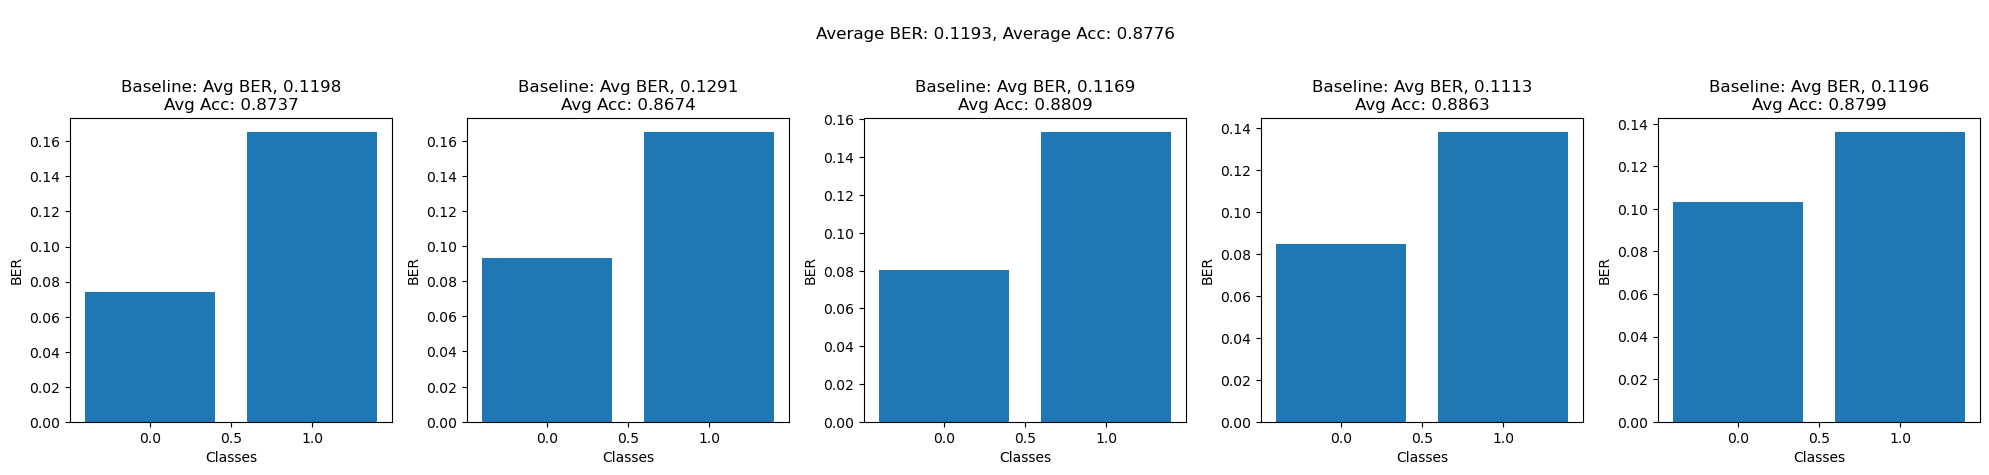

In [39]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(1,5)
i=0; j=0

# folder_dict={"DF":"DF", "Baseline":"Baseline", "Weight":"Weight","Grad":"Grad",
#              "Phases-Simul":"Phases", "Phases-ThresholdedSimul":"Phases", "NFS":"NFS"} #model: folder
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="Baseline"
epoch=100

# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{folder_dict[model]}/simul_study-{model}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{folder_dict[model]}/simul_study-{model}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['macro avg']['f1-score'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary['macro avg']['f1-score']))
plt.suptitle(f"\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

In [13]:
n_ber=[0.1198,0.1291,0.1169,0.1113,0.1196]
n_f1=[0.8737,0.8674,0.8809,0.8863]
p_ber=[0.1125,0.1297,0.1184,0.1177,0.1149]
p_f1=[0.8816,0.8862,0.8798,0.8808,0.8843]

In [15]:
if 0.5< np.std(n_f1)/ np.std(p_f1) < 2:
    res= ttest_ind(n_f1, p_f1)
else:
    res= ttest_ind(n_f1, p_f1, equal_var=False)
res

Ttest_indResult(statistic=-1.2720926059036521, pvalue=0.28141832852874155)

## Baseline

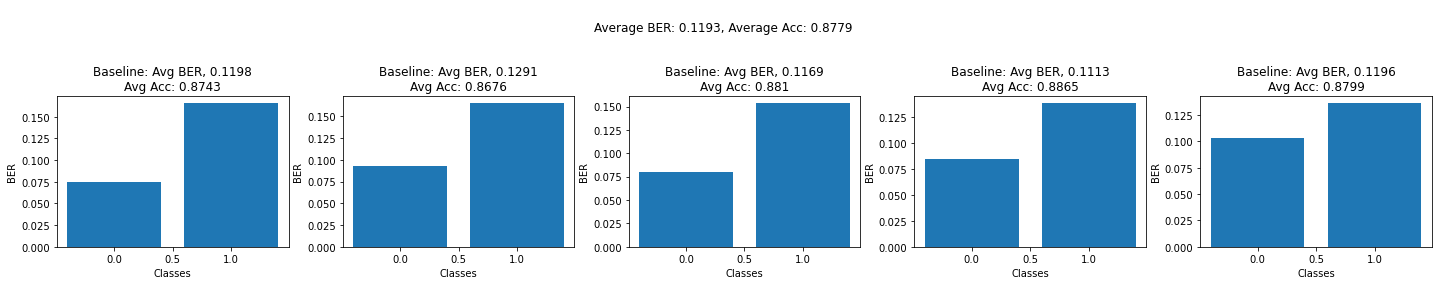

# DF

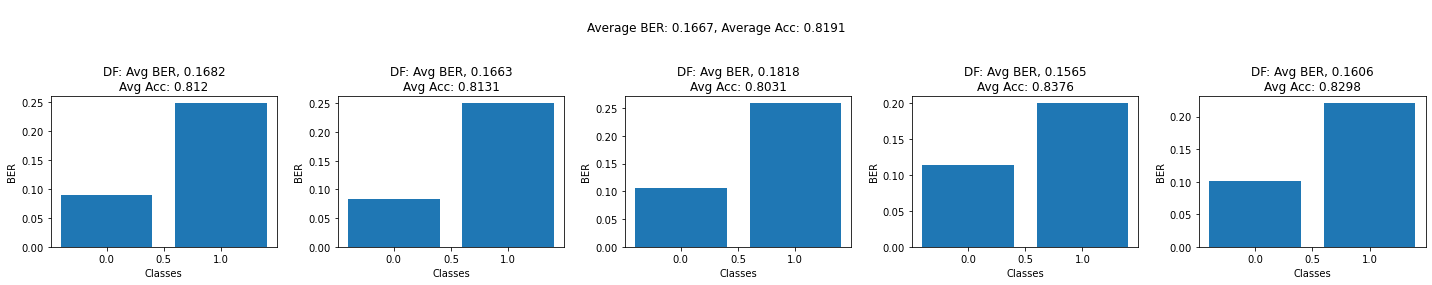

# NFS

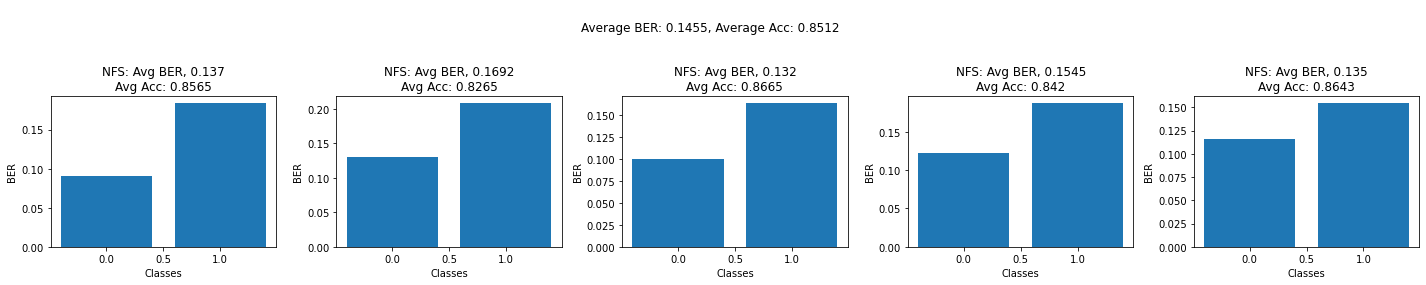

# Weight

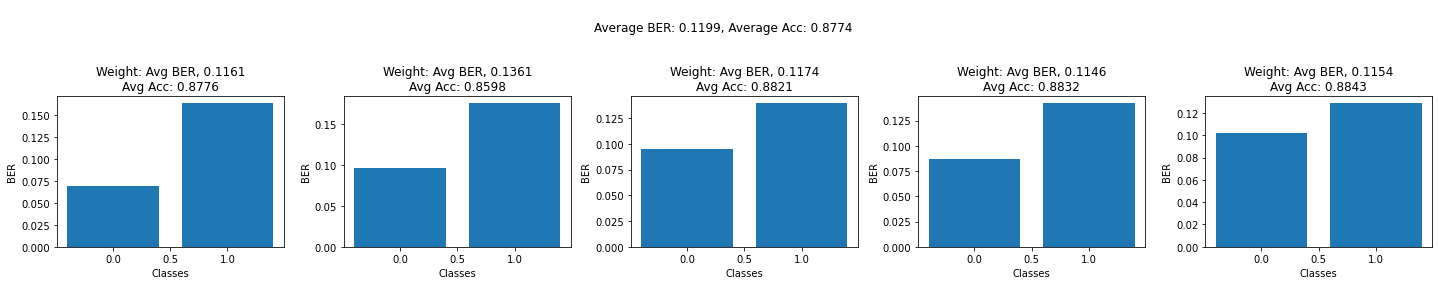

# Grad

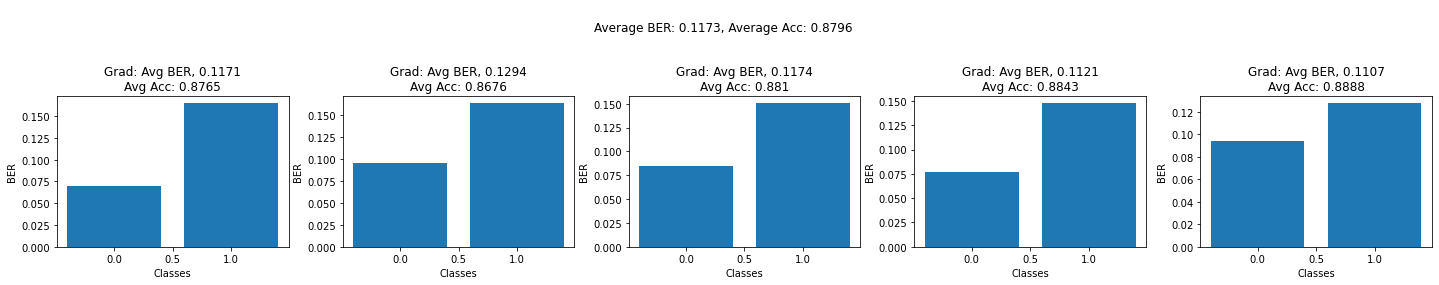

## save RS

In [78]:
import pickle
import os
epoch=100

for folder in range(5):
    for percentile in range(10,100,10):
        rs=[]
        dictionaries=[]
        for rs_folder in range(5):
            ber= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/RS/RS{rs_folder}/simul_study-subset-RS{rs_folder}-{percentile}-ber-{epoch}.pkl", "rb"))
            rs.append(ber)
            
            dictionary= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/RS/RS{rs_folder}/simul_study-subset-RS{rs_folder}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
            dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})        
        if not os.path.exists(f"./experiments/simul_study/exp_log{folder}/RS/subset"):
            os.mkdir(f"./experiments/simul_study/exp_log{folder}/RS/subset")
#         pickle.dump(np.array(rs).mean(0), open(f"./experiments/simul_study/exp_log{folder}/RS/subset/simul_study-subset-RS-{percentile}-ber-{epoch}.pkl", "wb"))
        dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }
#         pickle.dump(dictionary, open(f"./experiments/simul_study/exp_log{folder}/RS/subset/simul_study-subset-RS-{percentile}-v_dict-{epoch}.pkl", "wb"))    

## Subset

## RS

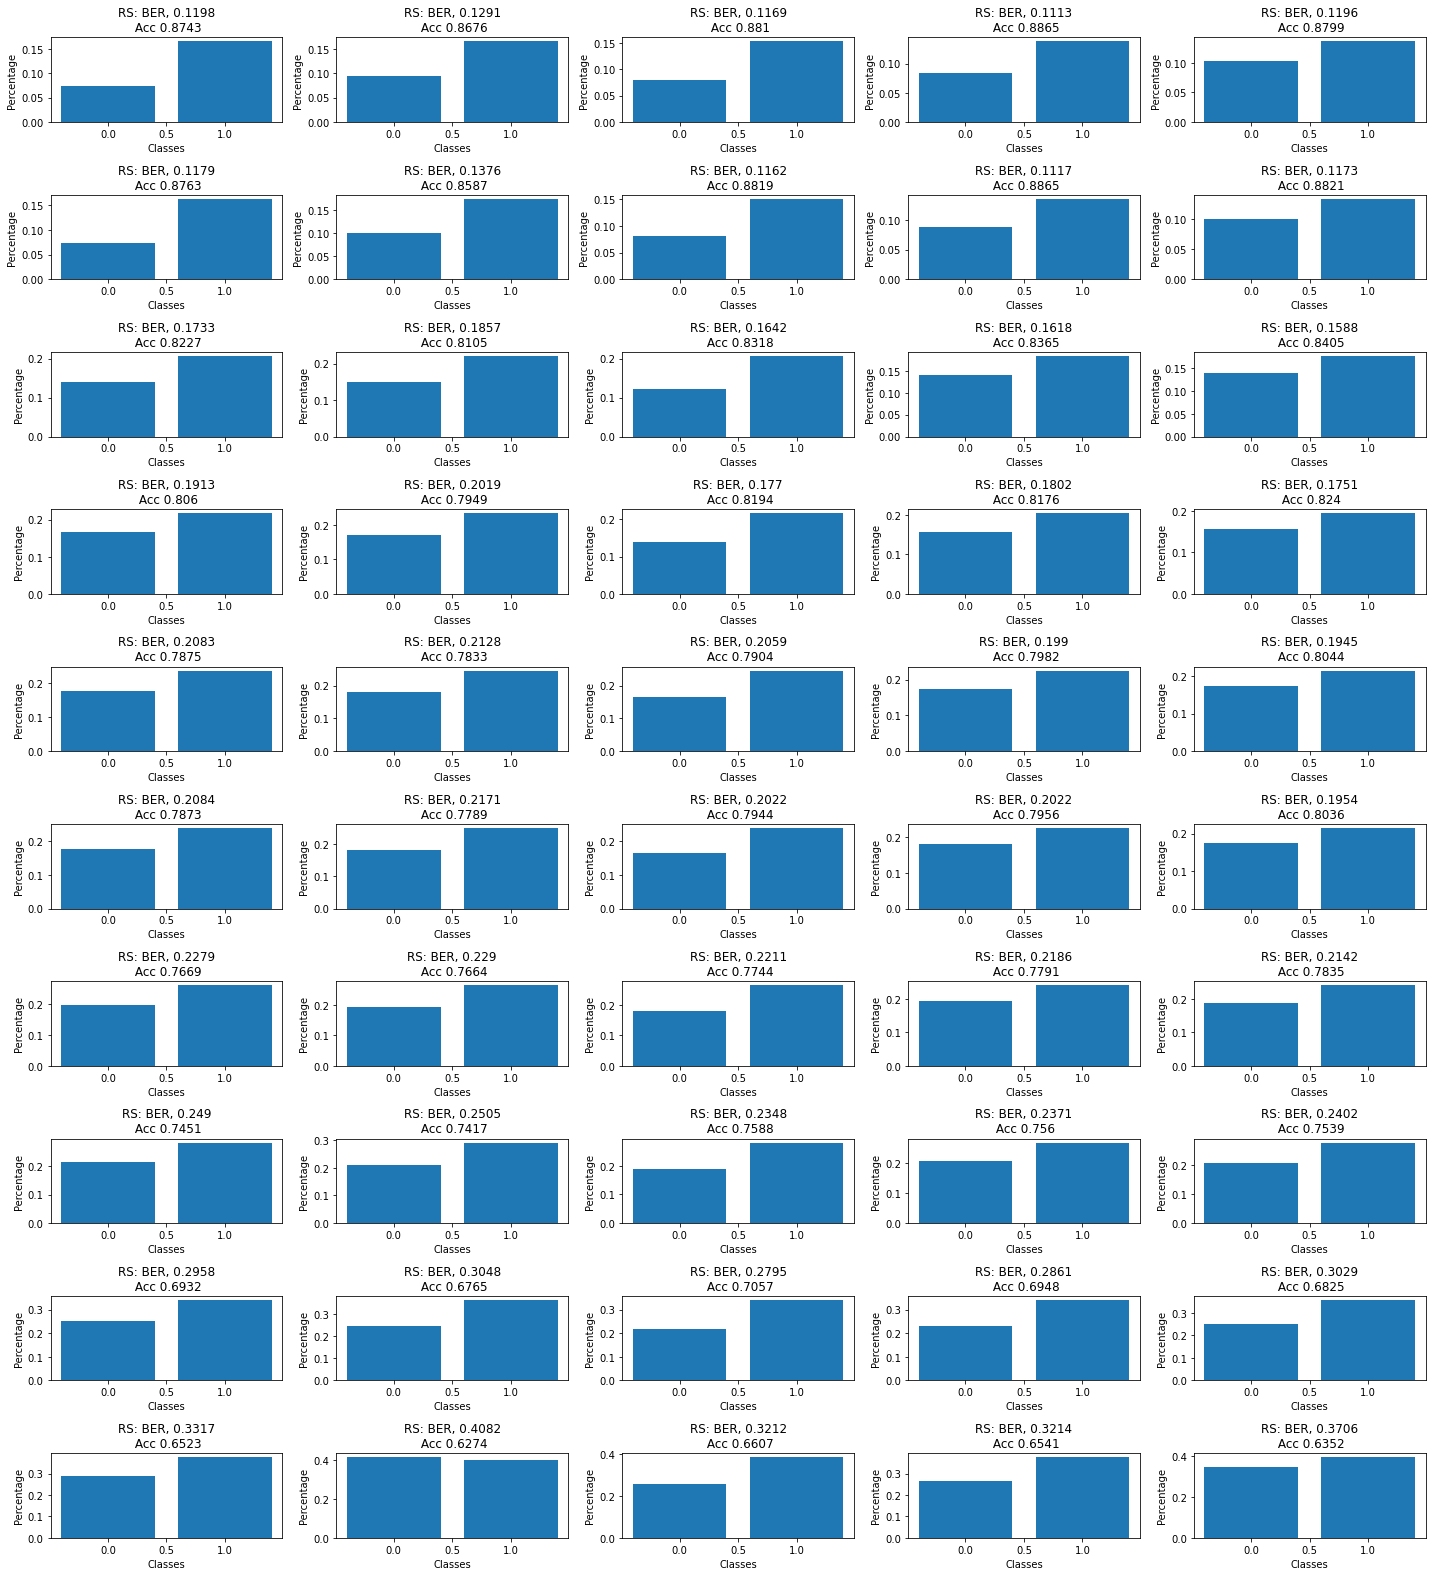

In [79]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="RS"
epoch=100

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## WEight

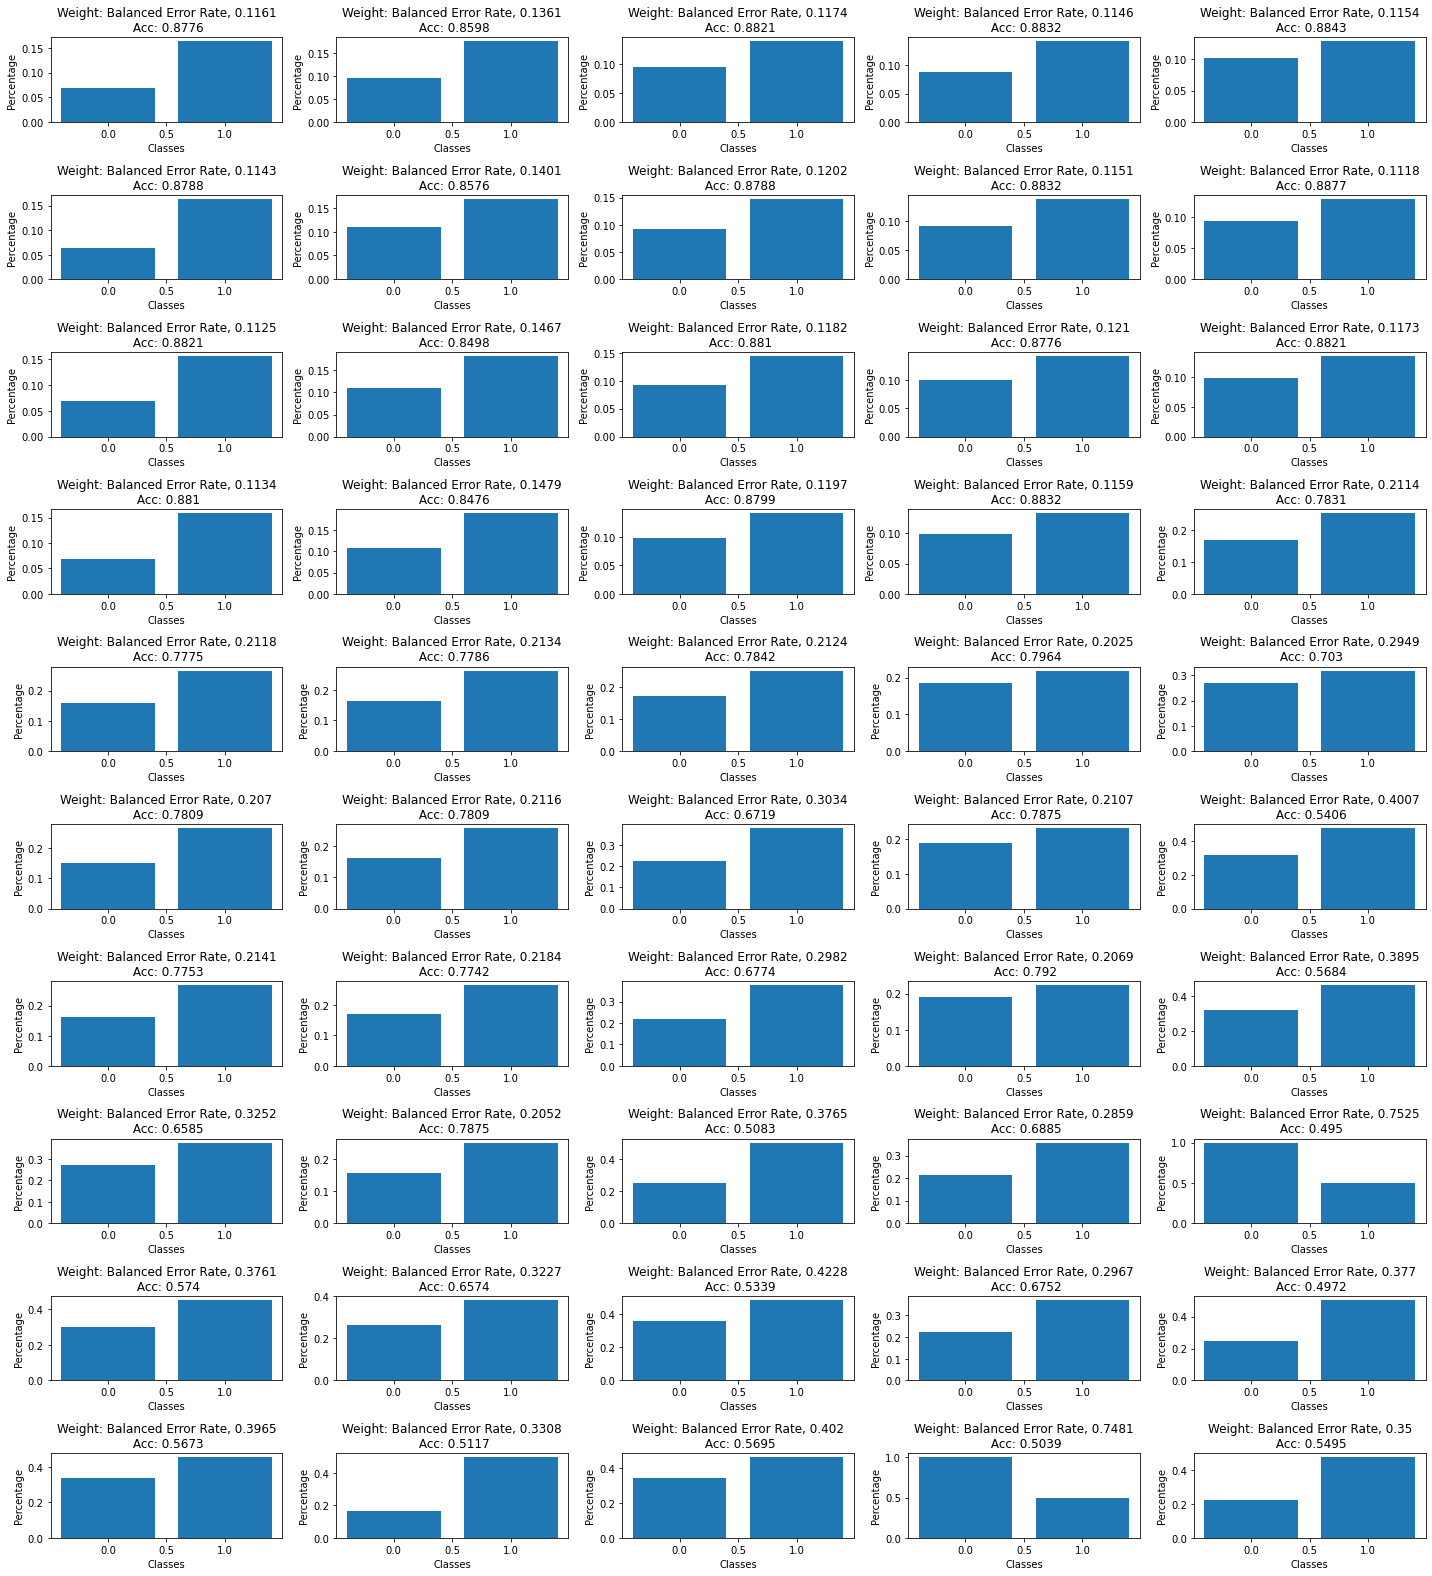

In [95]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="Weight"
epoch=100

weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-Score

In [31]:
import scipy.stats as st
for i in range(weight_ber.shape[1]):
    ber_list=np.array(weight_ber[:,i])
    print(i, ber_list)
    for value in weight_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print("cdf:", st.norm.cdf(z_score)) # % greater than population
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()

0 [0.1143 0.1345 0.1178 0.121  0.1139]
cdf: 0.21352617666199397
from mean 0.28647382333800603

cdf: 0.9699265381710399
from mean 0.4699265381710399

cdf: 0.37034650952432124
from mean 0.12965349047567876

cdf: 0.5369139603885257
from mean 0.03691396038852568

cdf: 0.1984430766480465
from mean 0.3015569233519535

1 [0.1179 0.1316 0.1139 0.1232 0.1162]
cdf: 0.33675730317468056
from mean 0.16324269682531944

cdf: 0.9598264075706079
from mean 0.4598264075706079

cdf: 0.14573386114197845
from mean 0.35426613885802155

cdf: 0.6620854616280396
from mean 0.1620854616280396

cdf: 0.2449084814127821
from mean 0.2550915185872179

2 [0.117  0.1425 0.2227 0.1177 0.1131]
cdf: 0.2680727883447539
from mean 0.2319272116552461

cdf: 0.4990359131394423
from mean 0.0009640868605577113

cdf: 0.9735480422799956
from mean 0.4735480422799956

cdf: 0.2736749997917387
from mean 0.2263250002082613

cdf: 0.2379538591530157
from mean 0.2620461408469843

3 [0.1179 0.1355 0.2161 0.1157 0.2112]
cdf: 0.178619764003373

## DF

In [8]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/DF/simul_study-DF-w-100.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))

[-1.43573200e-04 -8.60067667e-05 -4.14118473e-05 -1.90053233e-06
  9.80598197e-05  2.94171920e-04  5.97263162e-04  9.68817947e-04
  8.06596060e-03]
[-1.37246956e-04 -3.41021370e-05  3.95044102e-05  7.35324706e-05
  2.31149665e-04  4.27120866e-04  9.21654868e-03  3.86450082e-02
  7.52132893e-02]
[-8.91343945e-05 -4.13674919e-05 -5.19385831e-06  6.37858146e-05
  1.90505372e-04  1.38402637e-02  3.45935579e-02  4.08220902e-02
  7.21377023e-02]
[-5.60125198e-05 -2.32673126e-05  5.23441158e-06  1.28290884e-04
  2.42101538e-04  3.81646387e-04  1.09388726e-02  3.69357787e-02
  4.52444412e-02]
[-1.27920088e-04 -5.54489598e-05 -3.84788258e-05  7.30047381e-05
  1.90511877e-04  2.49718374e-04  1.43919863e-02  4.76712719e-02
  5.71263067e-02]


baseline ber 0.11863382316416238
baseline f1 0.8785523119286897


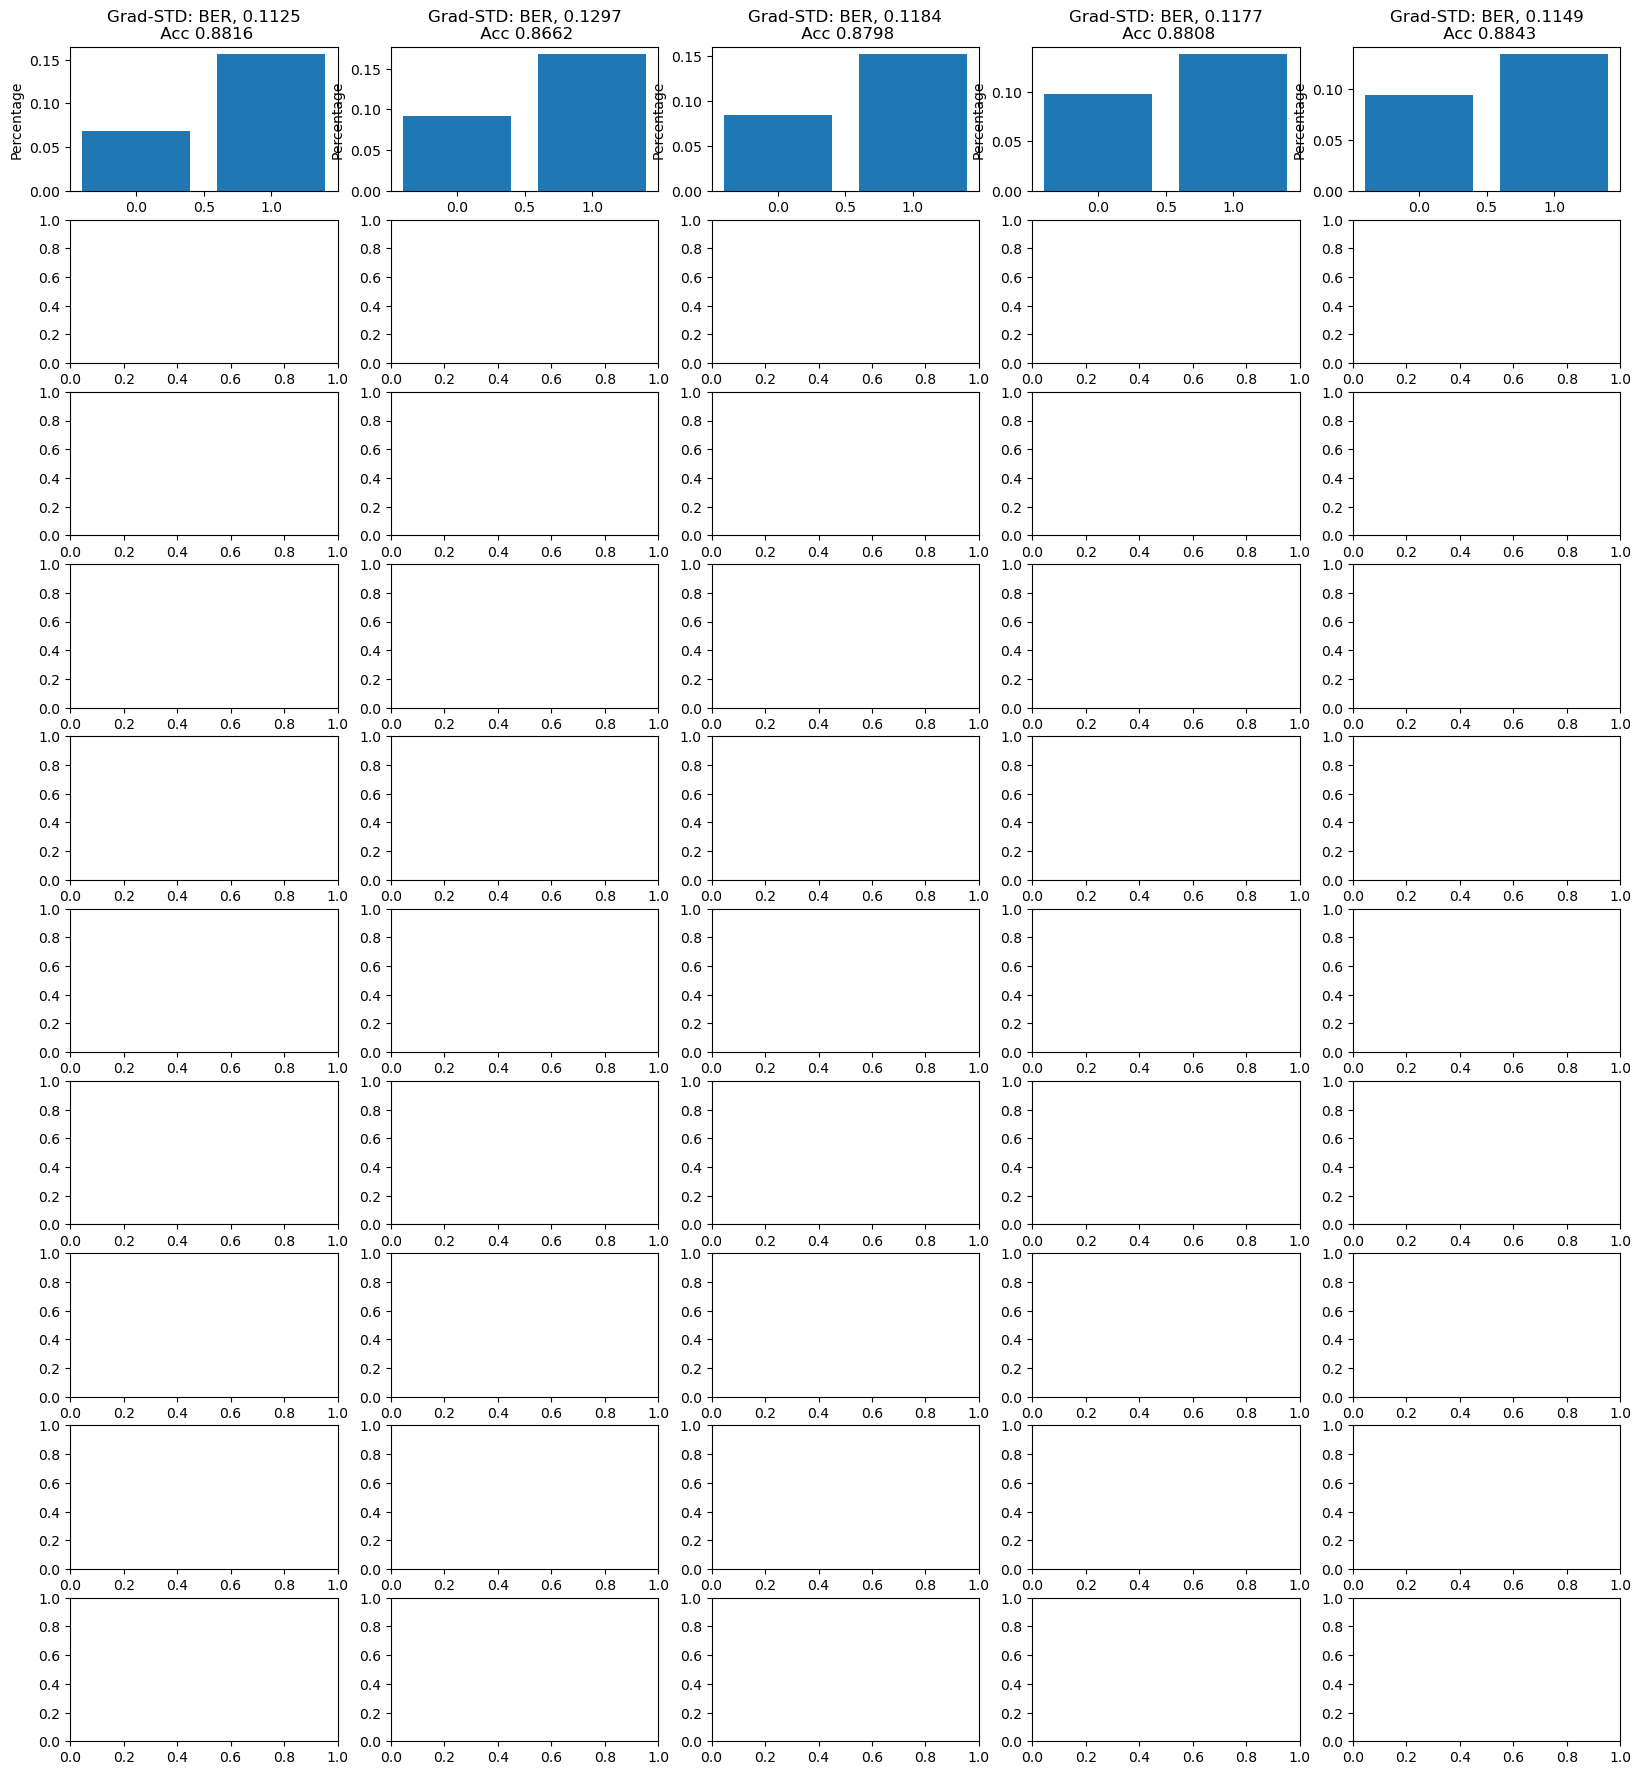

In [33]:
epoch=100
fig, axes= plt.subplots(10,5)
i=0; j=0
nfs_base_ber_avg=[];nfs_base_f1_avg=[]
fig.set_figheight(22)
fig.set_figwidth(20)
for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/Partial/simul_study-partial-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/Partial/simul_study-partial-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['macro avg']['f1-score'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

    nfs_base_ber_avg.append(ber); nfs_base_f1_avg.append(dictionary['macro avg']['f1-score'])

print("baseline ber", np.array(nfs_base_ber_avg).mean())
print("baseline f1", np.array(nfs_base_f1_avg).mean())

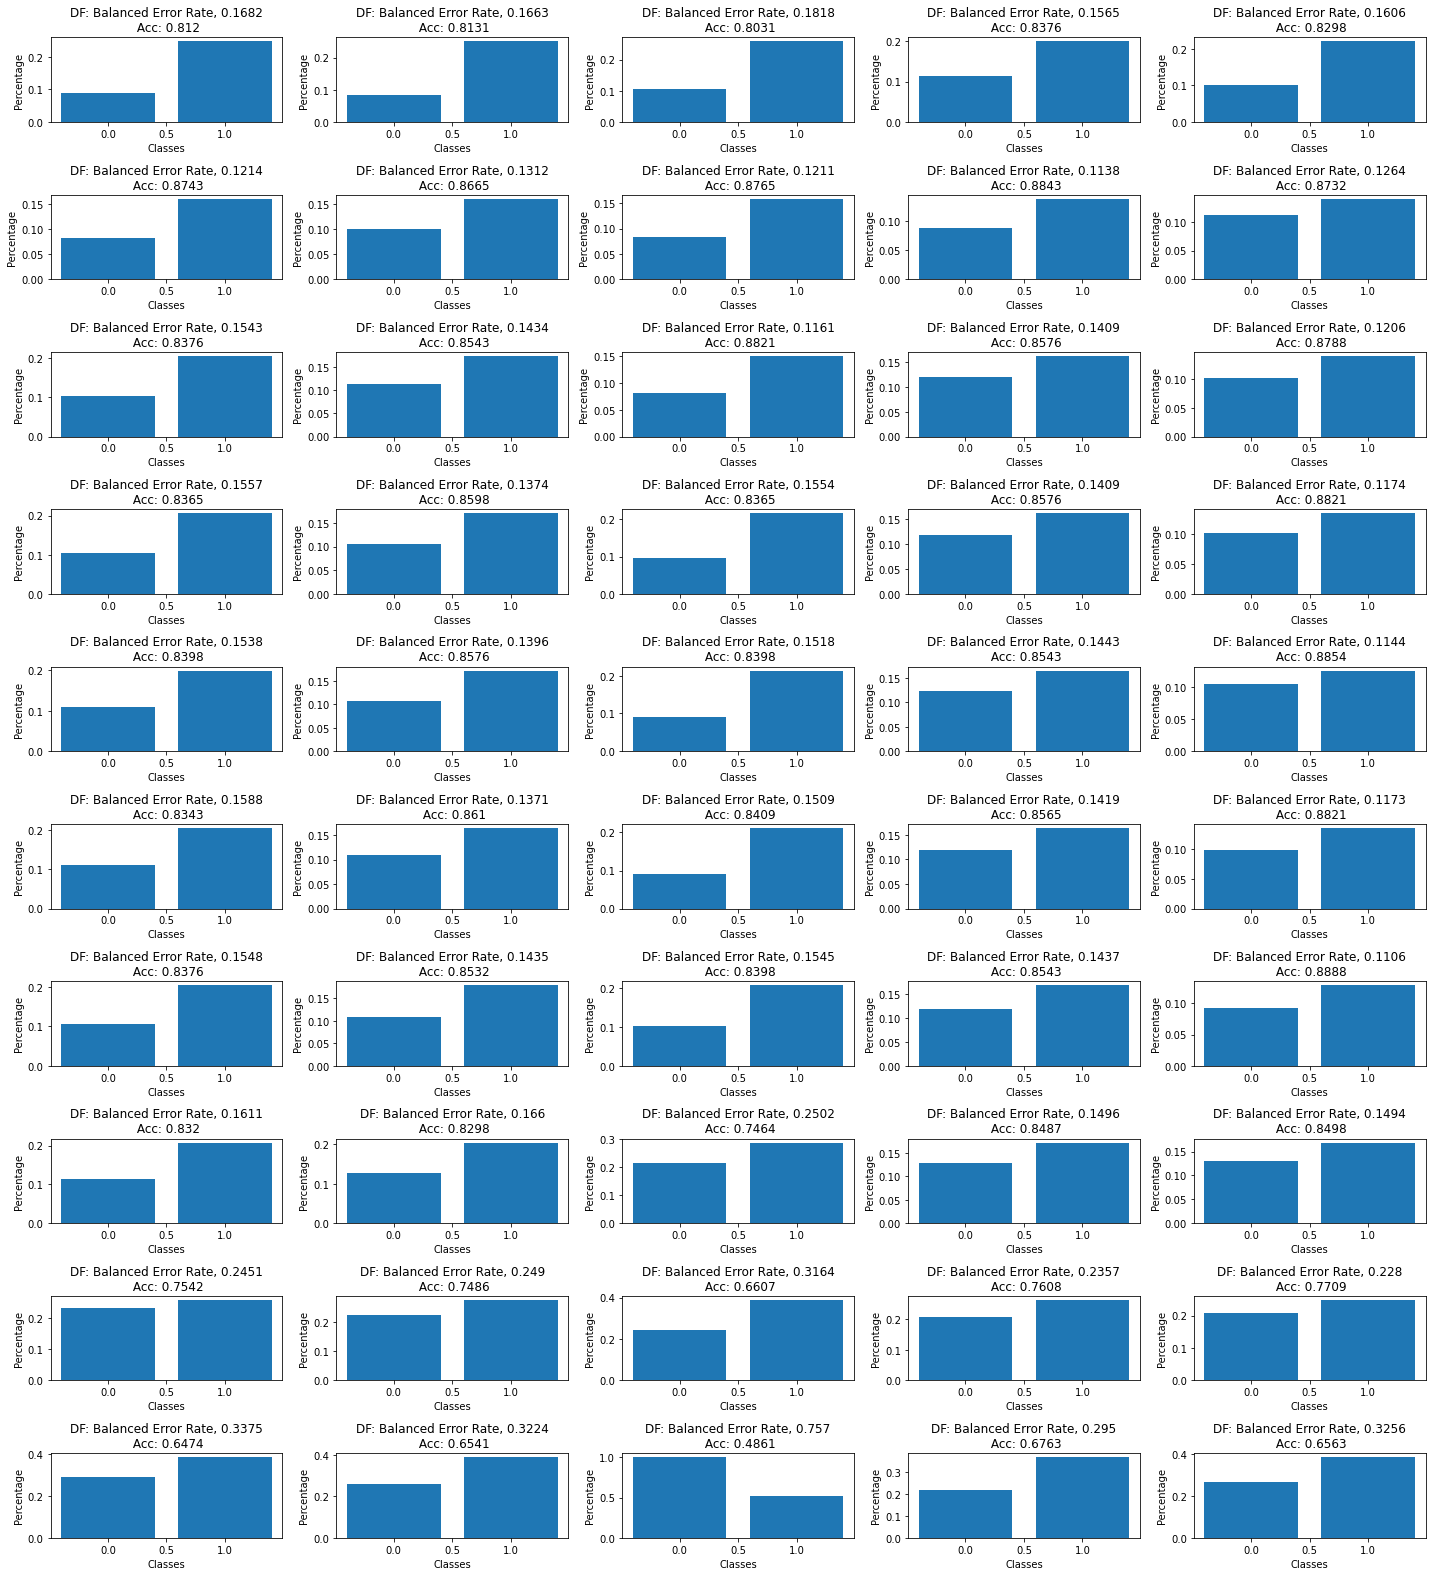

In [83]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"
epoch=100
weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Grad

##### AUC

In [12]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary= []
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 0.9999999551965857), ('x2', 0.9013135285602516), ('x13', 0.8816090647973738), ('x11', 0.5358799427195038), ('x1', 0.4376450422609537), ('x0', 0.37242692351139794), ('x10', 0.2889564029191689), ('x7', 0.02093476691917573), ('x8', 0.0070710539989242704), ('x9', -5.009175296777357e-10)]

[('x13', 0.999999916262027), ('x12', 0.6154238929627027), ('x2', 0.5096633910056596), ('x11', 0.3356787917910218), ('x0', 0.2861535645064279), ('x1', 0.2705042470454444), ('x10', 0.21994223355043374), ('x7', 0.010100722288710617), ('x9', 0.009573469999945905), ('x8', 8.974900822522613e-10)]

[('x12', 1.0000000048989932), ('x2', 0.7197129413359846), ('x0', 0.5339865645576367), ('x10', 0.4768276434617036), ('x1', 0.39069695285314765), ('x13', 0.24153594287235336), ('x11', 0.23852272862440316), ('x8', 0.010034134046917664), ('x9', 0.0018871223038638973), ('x7', -4.144911081027658e-10)]

[('x13', 0.9999999627348188), ('x12', 0.7865800189718186), ('x2', 0.6025403670775802), ('x0', 0.2817170435547638),

Text(96.0, 0.5, 'Runs')

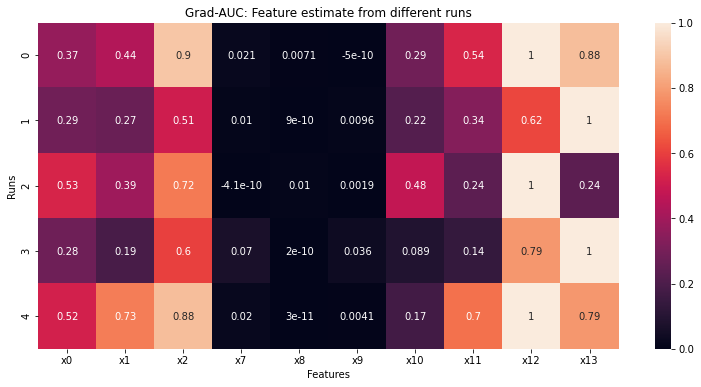

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-AUC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

In [15]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary= []
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 1.0000000272428977), ('x2', 0.9243108578012027), ('x13', 0.3256668406420804), ('x10', 0.26609925801445833), ('x0', 0.2562342412588503), ('x1', 0.23896028093432164), ('x11', 0.17122573504145588), ('x9', 0.03717841779957376), ('x8', 0.001546621978507634), ('x7', -4.262032393675952e-10)]

[('x13', 1.0000000422538733), ('x12', 0.5250362467281775), ('x2', 0.5026445258462218), ('x1', 0.38731597698750875), ('x11', 0.22872349858909047), ('x10', 0.17230954387949282), ('x0', 0.1275280067795279), ('x8', 0.009735729025358353), ('x9', 0.0040057101041721666), ('x7', -9.798517552894737e-11)]

[('x2', 0.999999963151609), ('x12', 0.8718019548641394), ('x11', 0.5385343200272743), ('x1', 0.4541972291822276), ('x0', 0.3395488012954573), ('x10', 0.22750756685062967), ('x13', 0.18754275594283598), ('x8', 0.05823749171201342), ('x9', 0.014725403769501044), ('x7', -1.9407864204623593e-11)]

[('x2', 0.9999999352718447), ('x12', 0.7748960047821924), ('x13', 0.7341697807824232), ('x10', 0.18927730886149

Text(96.0, 0.5, 'Runs')

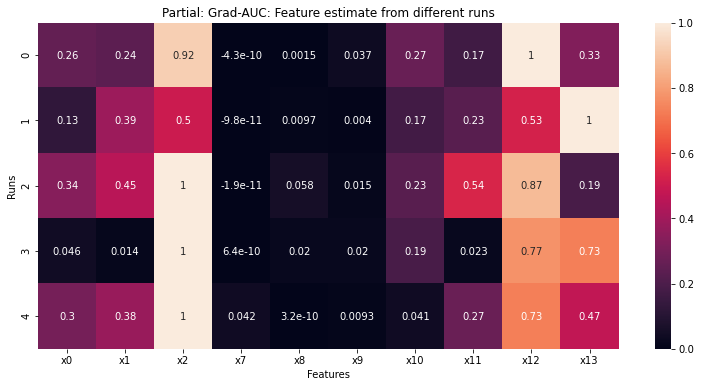

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-AUC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

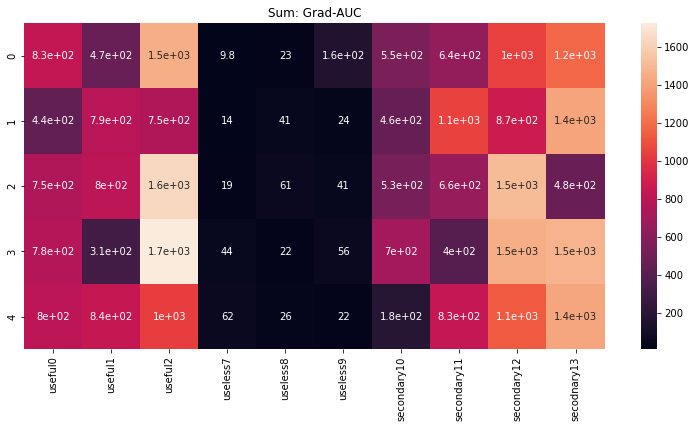

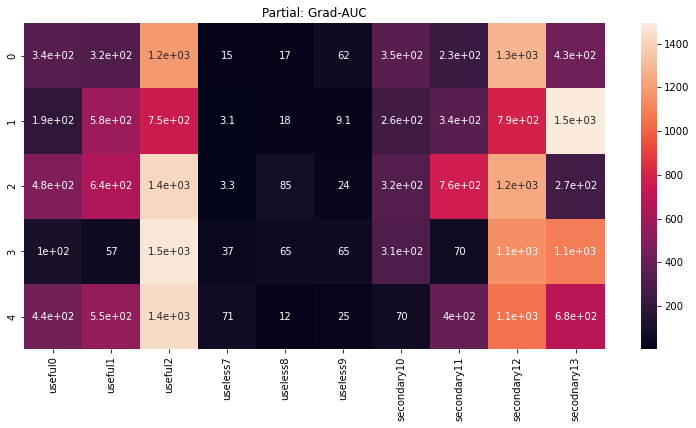

#### ROC

In [17]:
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[0.02563307 0.03597372 0.10891703 0.19151296 0.22969795 0.23723819
 0.24344251 0.39460175 0.9990281 ]
[0.01004973 0.01896998 0.13066558 0.18833129 0.23376523 0.27647845
 0.37967367 0.61294294 0.67960806]
[0.03196976 0.04167251 0.12183948 0.18724685 0.2471927  0.34873244
 0.44366255 0.52306941 0.84965347]
[0.01128099 0.02209683 0.02940156 0.03168086 0.08721895 0.18533764
 0.35514519 0.62847728 0.76121247]
[0.01673304 0.07071004 0.15326157 0.18337888 0.19261878 0.22028614
 0.28257241 0.43622879 0.75745598]


Text(96.0, 0.5, 'Runs')

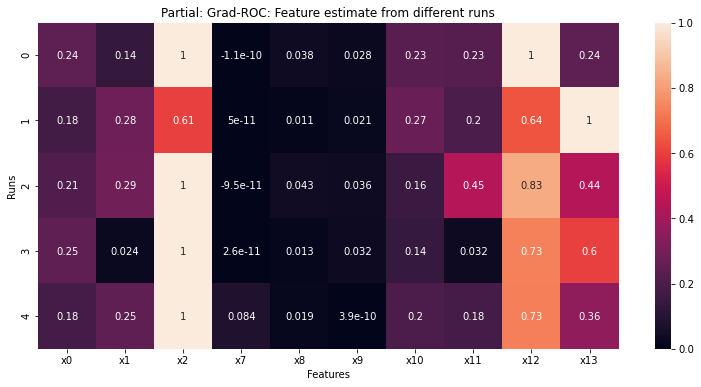

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-ROC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

In [19]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 1.0000000136816425), ('x2', 0.9981019774833726), ('x13', 0.6070354784115466), ('x11', 0.4044088597265727), ('x1', 0.3017130020206764), ('x0', 0.2427783860458277), ('x10', 0.16732336857788255), ('x8', 0.029869954248422204), ('x7', 0.009032303595493119), ('x9', 4.029079292422466e-10)]

[('x13', 1.0000000774606974), ('x12', 0.8999104376457581), ('x2', 0.6877411367962338), ('x11', 0.31913299028302333), ('x1', 0.2540602605099238), ('x0', 0.24938511942470143), ('x10', 0.24885464059052964), ('x7', 0.017521948867984527), ('x8', 0.0036521906742272847), ('x9', -1.2857706011004666e-09)]

[('x12', 1.0000000132727678), ('x2', 0.8209756395775685), ('x13', 0.6549777335625606), ('x0', 0.3918648634034412), ('x10', 0.34469730731242265), ('x1', 0.30644745724382716), ('x11', 0.18488199909052838), ('x9', 0.01298986435782723), ('x8', 0.006454325199839239), ('x7', -2.06007211289716e-10)]

[('x12', 1.0000000651691323), ('x13', 0.8619882608454219), ('x2', 0.6973384766195281), ('x0', 0.2883066258812974

Text(96.0, 0.5, 'Runs')

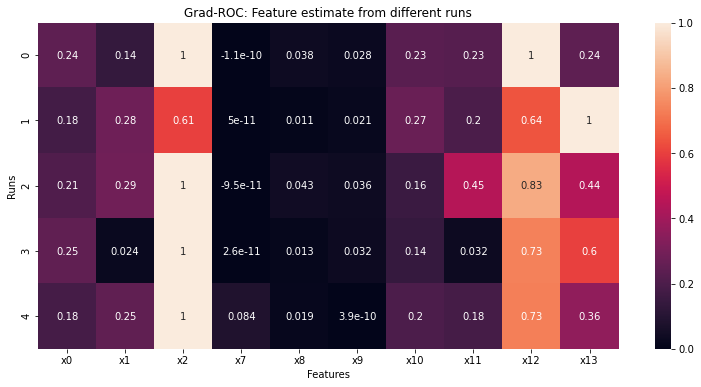

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-ROC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

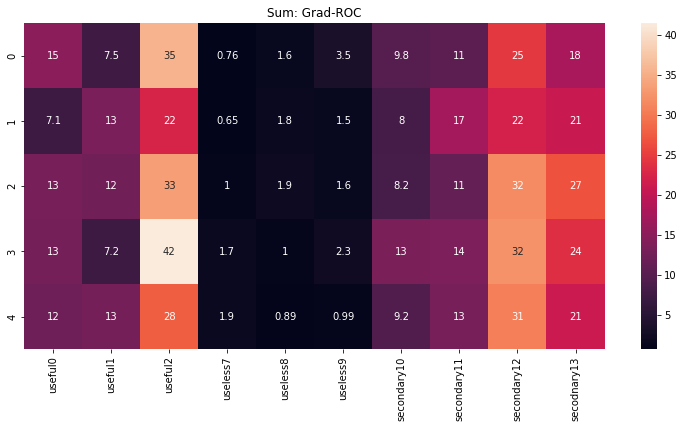

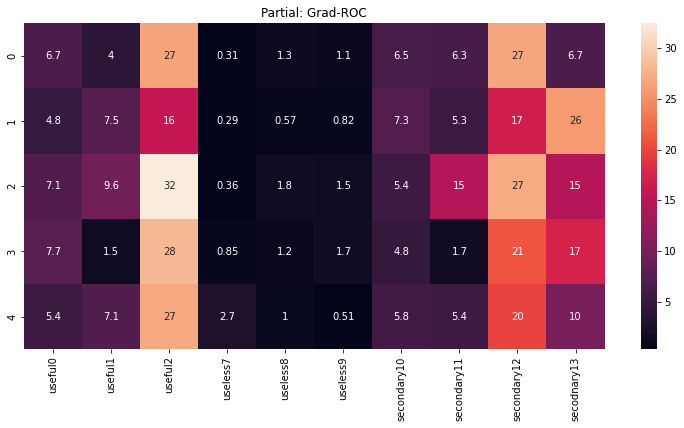

#### COV

In [38]:
from utilities.preproc_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary= process_cov(epoch, abs(np.cov(epoch.T )).mean(), channels)

    folder_dictionary.append(dictionary.copy())
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

Threshold:  17.791712229396254

[  0.           0.          30.33637164  66.33096607  96.97643492
 130.43541499 163.86663237 196.2275709  274.45783873]
Threshold:  15.746924992064507

[  0.           0.          39.45083954  70.40520521 114.44316085
 167.33232886 201.52591697 220.02720782 229.9252019 ]
Threshold:  18.599318855853813

[  0.           0.          27.8034383   58.86674004  83.43169616
  95.95265861 103.8299386  166.72136067 356.05197036]
Threshold:  23.85669588630834

[  0.           0.           0.          67.34296463 133.69939585
 157.20383477 176.70348981 256.97456106 429.73492208]
Threshold:  16.10795740224862

[  0.           0.           0.          87.10299097 149.49328651
 155.32505394 169.44277561 209.23850593 259.21998181]


In [59]:
from utilities.preproc_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary= process_cov(epoch, abs(np.cov(epoch.T )).mean(), channels)

    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()

Threshold:  17.791712229396254

[('useful2', 335.8197555053094), ('secondary12', 267.63984797899207), ('secodnary13', 178.37450162533491), ('useful0', 157.64897411690225), ('secondary11', 112.29304224106181), ('secondary10', 81.65982760132553), ('useful1', 43.33767377118224), ('useless7', 0), ('useless8', 0), ('useless9', 0)]

Threshold:  15.746924992064507

[('secondary12', 230.03282878839912), ('secodnary13', 229.91324335246878), ('secondary11', 217.55569894104718), ('useful2', 194.65601040811228), ('useful1', 149.11654116797953), ('secondary10', 79.7697805419242), ('useful0', 56.35834220664477), ('useless7', 0), ('useless8', 0), ('useless9', 0)]

Threshold:  18.599318855853813

[('useful2', 366.77741684566615), ('secondary12', 354.86025408157167), ('secodnary13', 119.68663731276499), ('useful0', 97.03421057597039), ('useful1', 95.23162396197954), ('secondary11', 71.63176834978631), ('secondary10', 39.71919756444178), ('useless7', 0), ('useless8', 0), ('useless9', 0)]

Threshold:  23

Text(0.5, 1.0, 'Grad-COV')

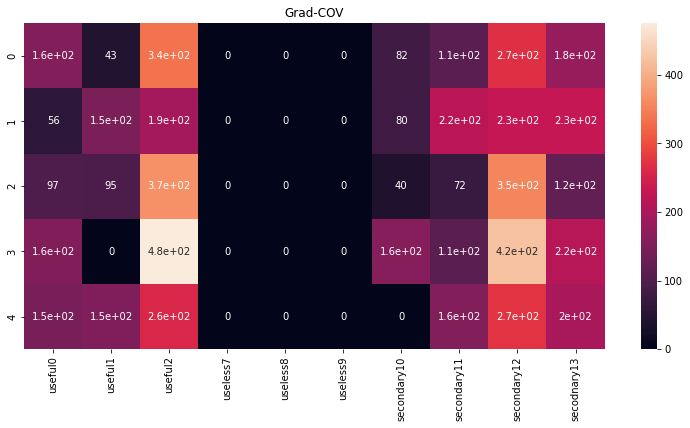

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-COV")

#### STD

In [21]:
import numpy as np
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[0.00124616 0.03035314 0.10168209 0.20174461 0.29471744 0.34805076
 0.36454179 0.37956418 0.46751846]
[0.00176769 0.03837289 0.16455897 0.22619045 0.24418894 0.31852673
 0.4196258  0.43282976 0.49392664]
[0.00965966 0.01956093 0.05294267 0.20237801 0.29494965 0.30281598
 0.35072324 0.45357148 0.55178794]
[0.00910391 0.01746756 0.08331319 0.15819322 0.21227277 0.28958809
 0.37339994 0.38874773 0.49244111]
[0.01607854 0.04144977 0.19693239 0.32841681 0.38196429 0.39072563
 0.4010927  0.42810348 0.49710106]


Text(0.5, 33.0, 'Features')

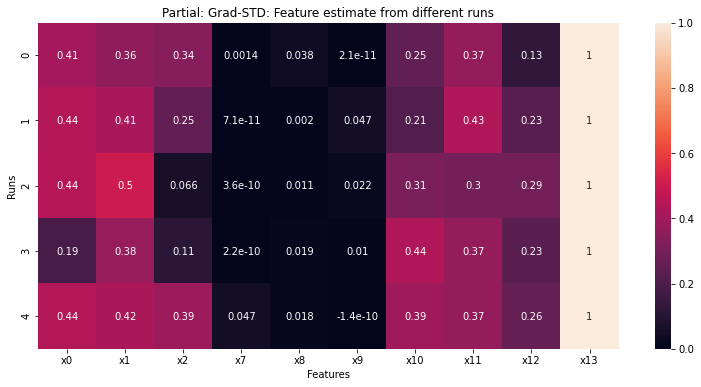

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-STD: Feature estimate from different runs")
plt.ylabel("Runs")
plt.xlabel("Features")

In [26]:
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]

folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())))
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()

[('x13', 0.9999999858616562), ('x11', 0.4820818977696568), ('x10', 0.3689792178830764), ('x0', 0.33696465940270315), ('x1', 0.29959650342541977), ('x2', 0.2547551984539016), ('x12', 0.1703418423630163), ('x8', 0.025442429391417276), ('x7', 0.022238451686414917), ('x9', -9.770984021884033e-11)]

[('x13', 0.9999999876837364), ('x11', 0.5646252314148654), ('x10', 0.3576649366564766), ('x0', 0.30730650605598697), ('x1', 0.24906812445775728), ('x12', 0.22052689094102362), ('x2', 0.18216785538902514), ('x9', 0.027162187682691297), ('x7', 0.00742890449456679), ('x8', 4.1057868216398674e-10)]

[('x13', 1.0000000802598379), ('x0', 0.5509535244638641), ('x1', 0.42060678016497377), ('x11', 0.39743479747031074), ('x10', 0.22855405819512953), ('x2', 0.21119590326520665), ('x12', 0.11514032283889719), ('x7', 0.010431710902242486), ('x9', 0.005648279247454369), ('x8', 4.113260843041644e-10)]

[('x13', 1.0000000174329813), ('x0', 0.4427414178640454), ('x2', 0.3871928381074454), ('x11', 0.3810249600195

Text(0.5, 33.0, 'Features')

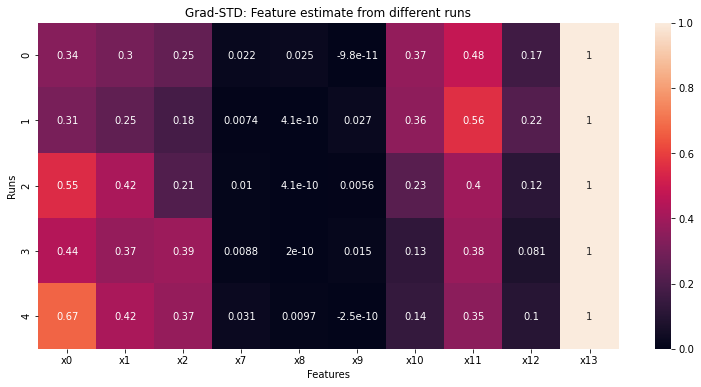

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-STD: Feature estimate from different runs")
plt.ylabel("Runs")
plt.xlabel("Features")

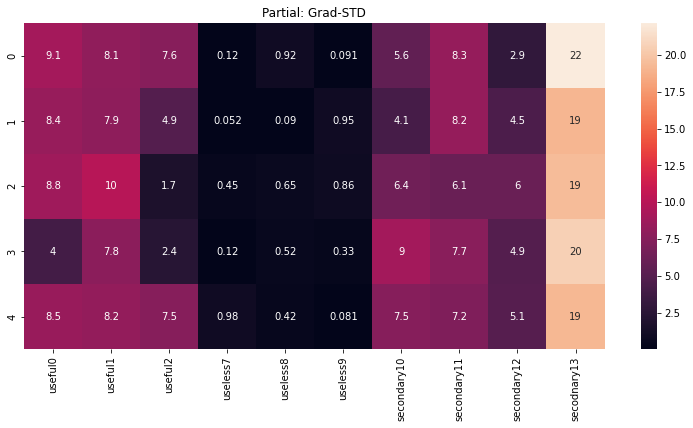

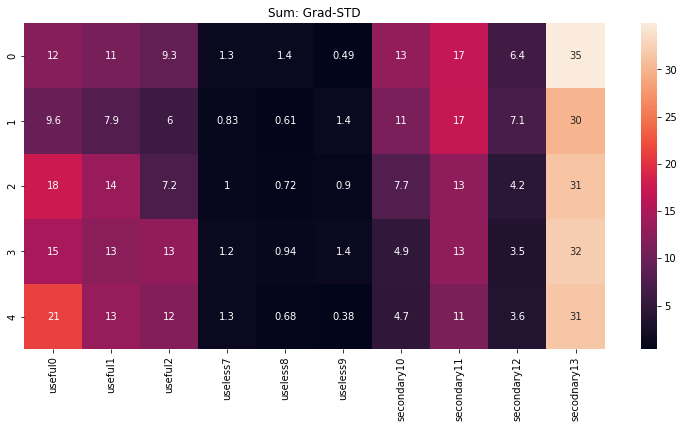

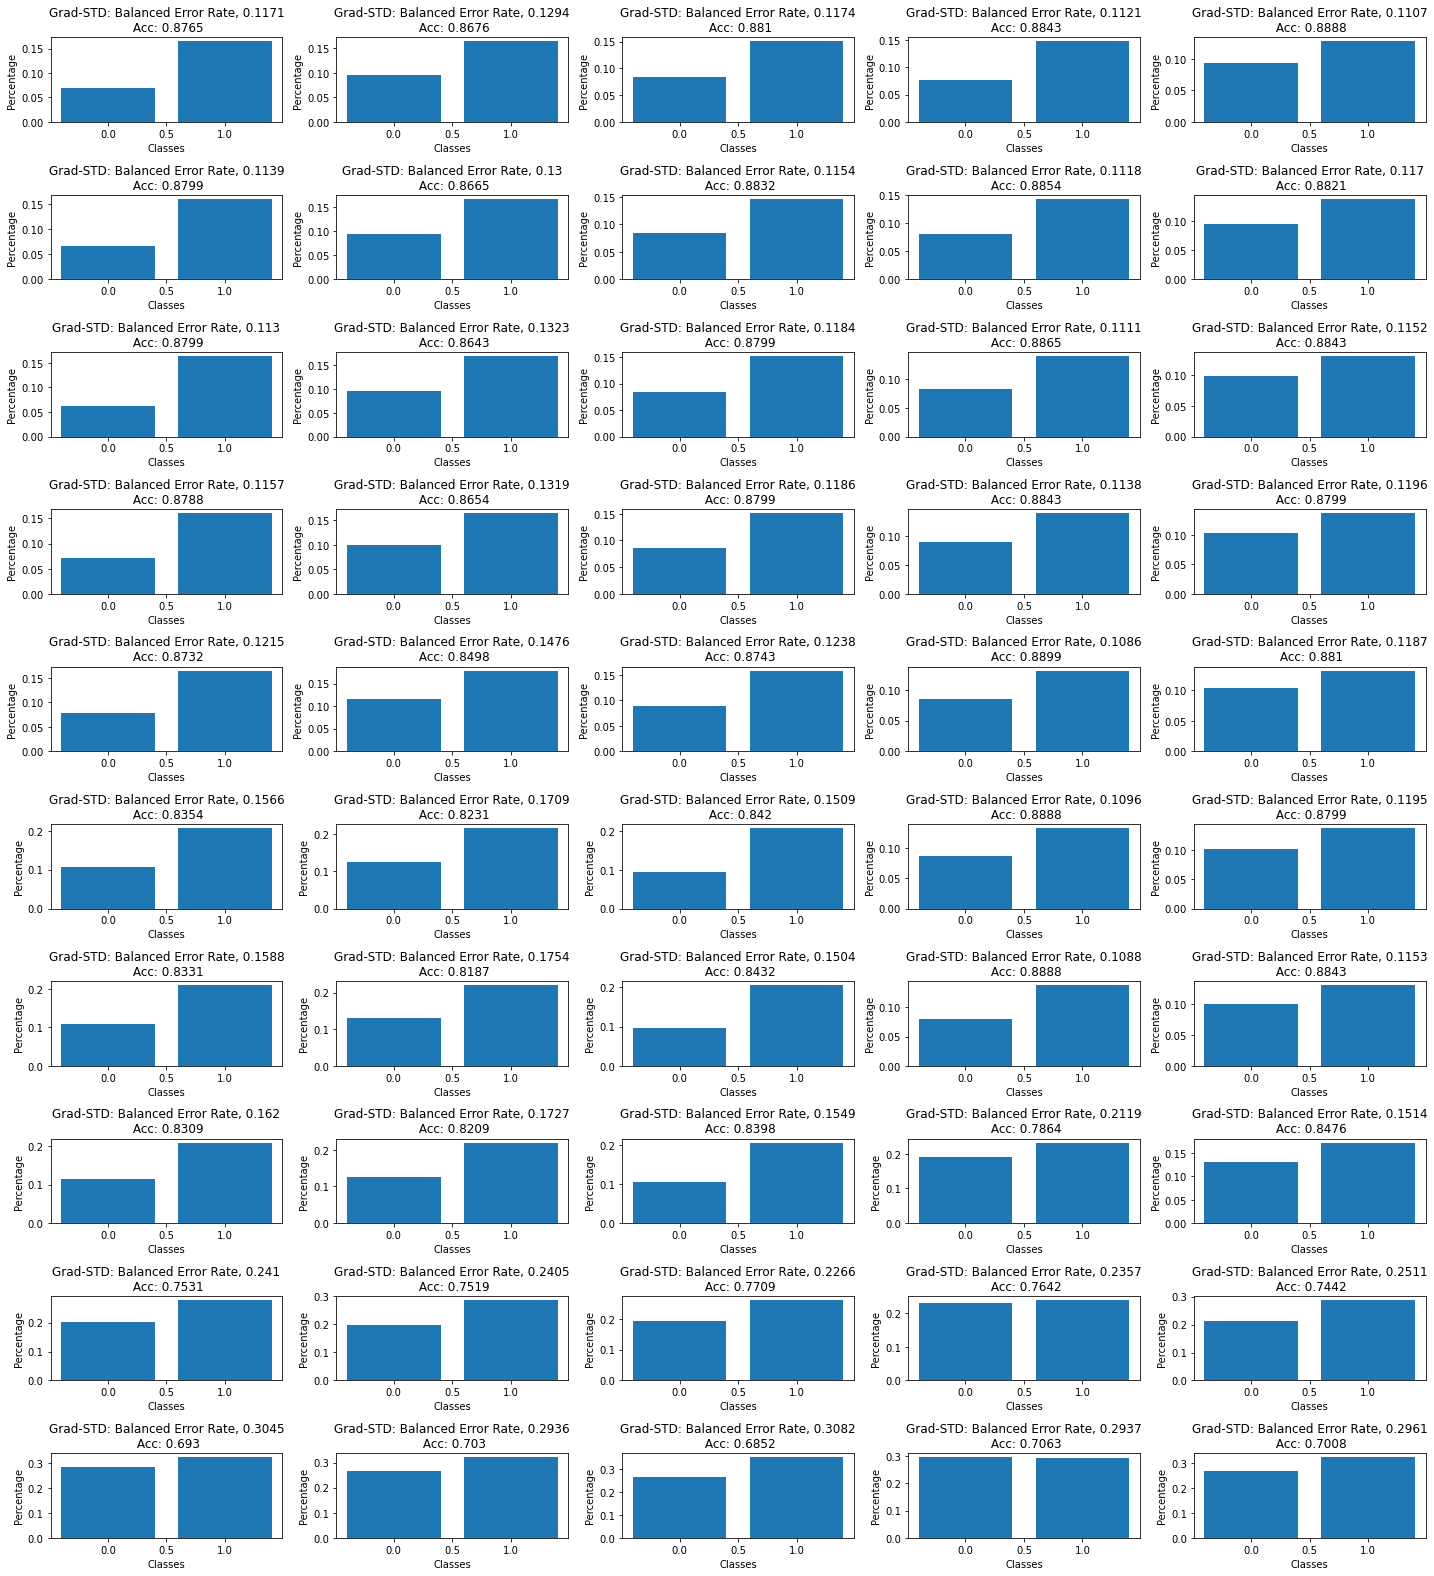

In [108]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-ROC":"Grad", "Grad-COV":"Grad", "Grad-STD":"Grad"} #folder: model
model="Grad-STD"
epoch=100
weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )

    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

# Weights Heatmap

In [29]:
import pickle
ws=[]
# original_dict={"Grad-sum":"Grad", "Grad-std":"Grad"} #folder: model
# model="Grad-sum"

original_dict={"DF":"DF", "RS":"RS", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"

epoch=100
for folder in range(5):
    scaler=MinMaxScaler()
    w= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{model}-w-{epoch}.pkl", "rb") )
    print(w)
    w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
    ws.append(w) #(abs(w))
        #         bers.append(ber)
#     print("percentile "+str(percentile),round(np.mean(bers), 4))


[ 7.6732218e-02  1.0022003e-01 -3.2966910e-04  1.7897553e-06
 -2.6196483e-05 -1.6347550e-04  3.4233020e-04  6.4956583e-04
 -5.6079071e-04  4.8447866e-02]
[ 5.5118274e-02  8.6661100e-02  3.5413425e-02 -4.0140330e-05
  9.8024619e-05 -8.4850100e-05  9.4429241e-05  4.8429015e-04
  5.2283960e-04  5.0402112e-02]
[-9.9290148e-05  8.4249645e-02 -2.7273785e-04  9.4222414e-05
  2.9349202e-04  9.4867401e-02  3.4721501e-02  6.7892554e-04
  8.1182930e-05  5.1539958e-02]
[ 1.4079309e-01  4.8453963e-04 -3.7330014e-04 -1.4248182e-04
  1.6360203e-04  7.8086254e-05  4.4208227e-04  1.1592461e-01
 -5.3875480e-04  1.1355335e-01]
[ 3.2495303e-05  8.4566837e-04  1.3722358e-03 -1.3359165e-04
 -1.5084558e-05  4.3573676e-04  1.3595916e-01  5.6702226e-02
 -2.4511109e-04  4.1650169e-02]


Text(96.0, 0.5, 'Runs')

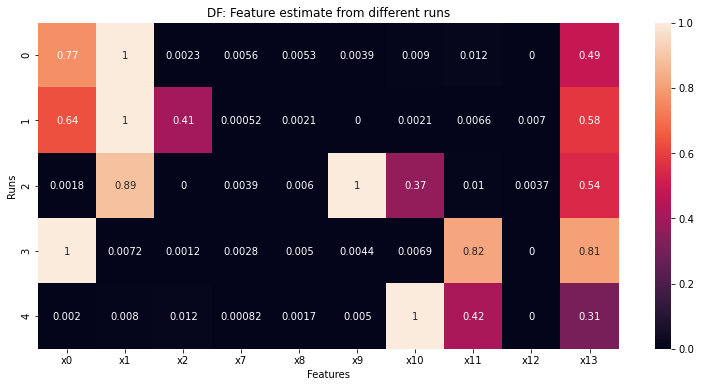

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
x_labels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(ws), xticklabels=x_labels, annot=True)
plt.title("DF: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

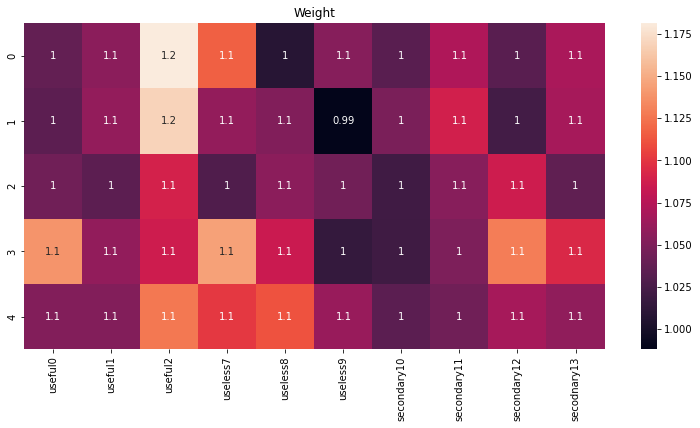

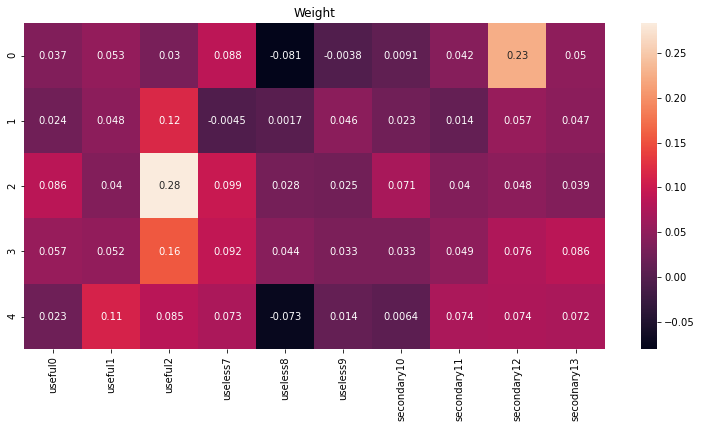

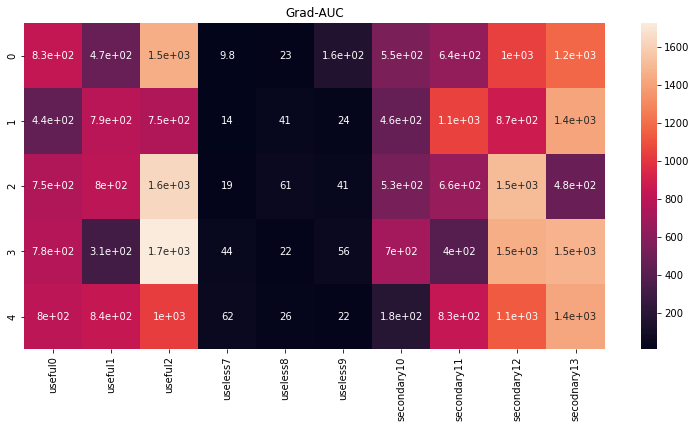

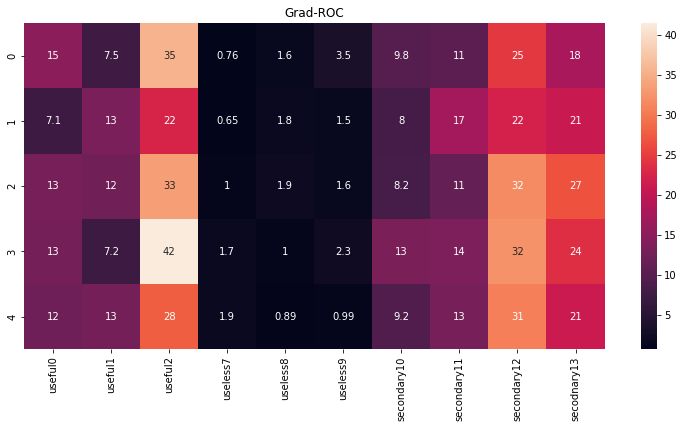

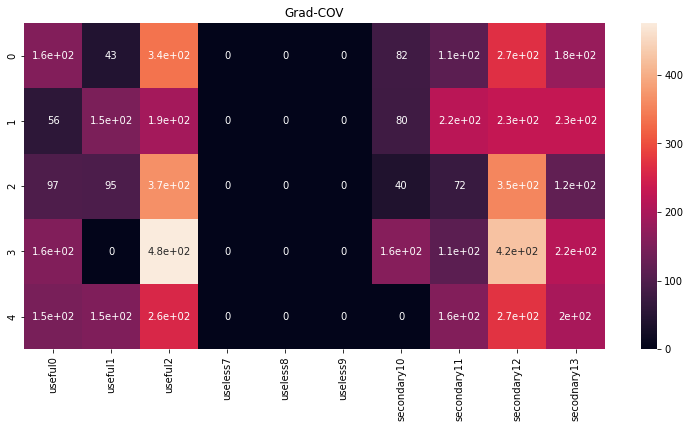

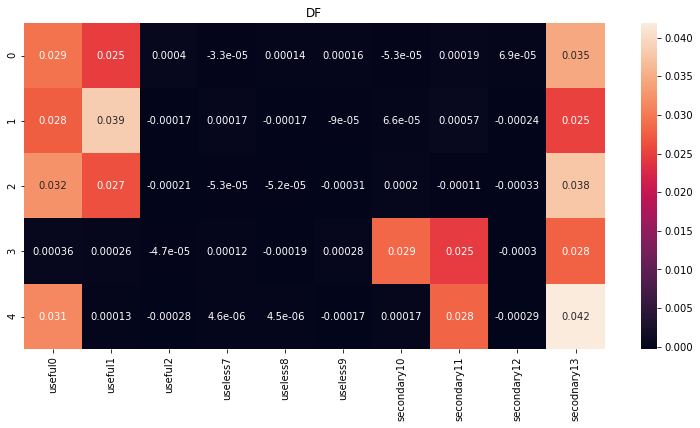

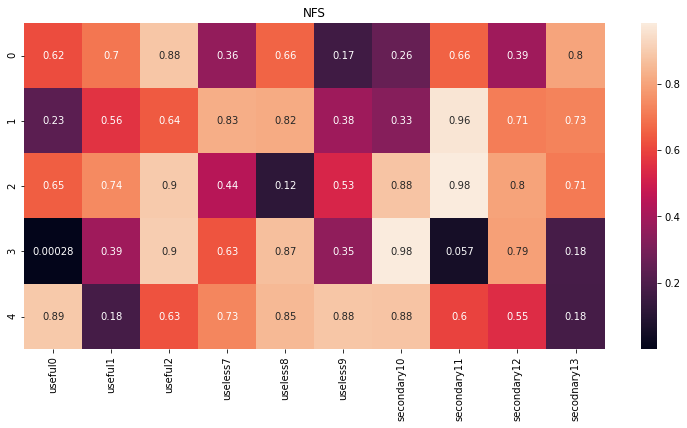

## Individual Folder

0.11636056544523365

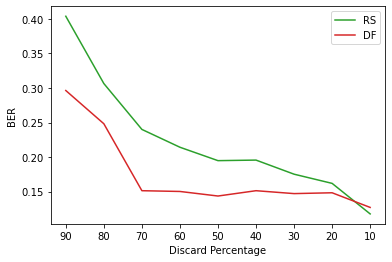

In [123]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


# fig, axes= plt.subplots(5,7)
i=0; j=0
folder="4"

# models={"Fisher":[], "FScore":[], "RS":[], "DF":[], "Simul":[], "ThresholdedSimul":[]}
models={ "RS":[], "DF":[]}
for_range= range(90,0,-10)
for model in models.keys():
    for percentage in for_range:
        
        if percentage==0:
            continue
        
        ber= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentage}-ber.pkl", "rb"))

        models[model].append(round(np.mean(ber),4))
        
# models["Grad-sum"]=[]
# models["Grad-std"]=[]

# for model_dir, model in [("Grad", "Grad-std"), ("Grad", "Grad-sum")]:
#     for percentage in for_range:
        
#         if percentage==0:
#             continue
        
#         ber= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-ber.pkl", "rb"))

#         models[model].append(round(np.mean(ber),4))
        

        #["subset-DF","subset-simul"]
for model, result in models.items():
    plt.plot(result, color=palette[colour[model]])
plt.legend(models.keys())
plt.xticks(range(len(for_range)),labels=[str(i) for i in for_range])
plt.ylabel("BER")
plt.xlabel("Discard Percentage")
p
# plt.ylim(top=1.0)

#         axes[i][j].set_title("BER, "+str(round(np.mean(ber),4)))
#         axes[i][j].set_xlabel("Classes")
#         axes[i][j].set_ylabel("Percentage")
#         axes[i][j].set_ylim([0, 0.7])
# #     print(plt.yticks())
# #     axes[i][j].set_yticks(["0."+str(z) for z in range(10)])
    
    
#         if j<6:
#             j+=1
#         elif j==6:
#             i+=1; j=0

# plt.suptitle("Dataset: "+dataset )
# # plt.tight_layout()
# fig.set_figheight(10)
# fig.set_figwidth(20)
# plt.tight_layout()

## Subset

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
complete_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [3]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [73]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [169]:
grad_comparison= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("RS", "RS"),("DF","DF")]

In [80]:
developing_methods= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight")]

In [3]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

In [4]:
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
epoch=100
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)

In [13]:
[str(i) for i in for_range][1]

'80'

In [10]:
from scipy.stats import ttest_ind

total_pval=[]
total_tstats=[]
for percentage_idx in [0,1,2,3,4,5,6,7,8,9]:

    pval=[]
    tstats=[]
    for key in ["Grad-ROC"]:
        v= np.array(ber_dictionary_average_sns[key])[:,percentage_idx]
        rs_v= np.array(ber_dictionary_average_sns['RS'])[:, percentage_idx]
        
        print(rs_v, v)
        
        if 0.5< np.std(rs_v)/ np.std(v) < 2:
            print("similar variance")
            res= ttest_ind(v, rs_v)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()

        
        if np.std(rs_v) > 2*np.std(v) or np.std(v) > 2*np.std(rs_v):
            print("unqeual variance")
            res= ttest_ind(v, rs_v, equal_var=False)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()
        
        pval.append(res.pvalue)
        tstats.append(res.statistic)
        
    total_pval.append(pval)
    total_tstats.append(tstats)
    print(for_range[percentage_idx], np.array(tstats).mean(), np.array(pval).mean())
    print()
    
print(np.array(total_tstats).mean(), np.array(total_pval).mean())
        

[0.33171306 0.40822968 0.32117912 0.32143454 0.37064121] [0.40084824 0.29364477 0.39910975 0.38707464 0.39871261]
similar variance
Grad-ROC: 90, Ttest_indResult(statistic=0.9416273478856304, pvalue=0.3739440902460369)

90 0.9416273478856304 0.3739440902460369

[0.29582435 0.30477465 0.27946705 0.28613777 0.30287325] [0.39107785 0.28384196 0.39708089 0.27466835 0.3652192 ]
unqeual variance
Grad-ROC: 80, Ttest_indResult(statistic=1.8118298786356166, pvalue=0.139681667341499)

80 1.8118298786356166 0.139681667341499

[0.24901559 0.25054699 0.23482014 0.23710688 0.24018373] [0.27600633 0.28232489 0.29225688 0.27248092 0.30346888]
similar variance
Grad-ROC: 70, Ttest_indResult(statistic=6.6365575010369, pvalue=0.00016306573677892576)

70 6.6365575010369 0.00016306573677892576

[0.22786599 0.22895662 0.22112417 0.2185647  0.21423891] [0.21040184 0.21258884 0.19462081 0.20452103 0.21321271]
similar variance
Grad-ROC: 60, Ttest_indResult(statistic=-3.3880734364874003, pvalue=0.0095270866024294

In [9]:
from scipy.stats import ttest_ind

total_pval=[]
total_tstats=[]
for percentage_idx in [0,1,2,3,4,5,6,7,8,9]:

    pval=[]
    tstats=[]
    for key in ["Grad-AUC"]:
        v= np.array(ber_dictionary_average_sns[key])[:,percentage_idx]
        rs_v= np.array(ber_dictionary_average_sns['RS'])[:, percentage_idx]
        
        print(rs_v, v)
        
        if 0.5< np.std(rs_v)/ np.std(v) < 2:
            print("similar variance")
            res= ttest_ind(v, rs_v)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()

        
        if np.std(rs_v) > 2*np.std(v) or np.std(v) > 2*np.std(rs_v):
            print("unqeual variance")
            res= ttest_ind(v, rs_v, equal_var=False)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()
        
        pval.append(res.pvalue)
        tstats.append(res.statistic)
        
    total_pval.append(pval)
    total_tstats.append(tstats)
    print(for_range[percentage_idx], np.array(tstats).mean(), np.array(pval).mean())
    print()
    
print(np.array(total_tstats).mean(), np.array(total_pval).mean())
        

[0.33171306 0.40822968 0.32117912 0.32143454 0.37064121] [0.40084824 0.2948915  0.39979696 0.29479038 0.37733567]
var 0.4897055810131393
similar variance
Grad-AUC: 90, Ttest_indResult(statistic=0.097438416103564, pvalue=0.9247752088970381)

90 0.097438416103564 0.9247752088970381

[0.29582435 0.30477465 0.27946705 0.28613777 0.30287325] [0.38678726 0.28360207 0.3997591  0.28360506 0.37917229]
var 0.0350478532442525
unqeual variance
Grad-AUC: 80, Ttest_indResult(statistic=2.000953115605891, pvalue=0.11136918160536959)

80 2.000953115605891 0.11136918160536959

[0.24901559 0.25054699 0.23482014 0.23710688 0.24018373] [0.28311449 0.27702151 0.28395342 0.28477144 0.29405903]
var 1.3406101655474127
similar variance
Grad-AUC: 70, Ttest_indResult(statistic=10.098637674285914, pvalue=7.888023119954844e-06)

70 10.098637674285914 7.888023119954844e-06

[0.22786599 0.22895662 0.22112417 0.2185647  0.21423891] [0.2154153  0.20875952 0.28680978 0.19798379 0.21078709]
var 0.030474504605935402
unqeu

In [6]:
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j,4), end="")
        print(" & ", end="")
#     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
    print(); print()

RS
0.1193 & 0.1202 & 0.1687 & 0.1851 & 0.2041 & 0.205 & 0.2222 & 0.2423 & 0.2938 & 0.3506 & 

Fisher
0.1193 & 0.1199 & 0.1213 & 0.1412 & 0.1487 & 0.1536 & 0.1541 & 0.2315 & 0.2361 & 0.2991 & 

FScore
0.1193 & 0.1208 & 0.1208 & 0.1406 & 0.147 & 0.1552 & 0.1535 & 0.2331 & 0.2334 & 0.2994 & 

DF
0.1667 & 0.1228 & 0.135 & 0.1413 & 0.1408 & 0.1412 & 0.1414 & 0.1753 & 0.2548 & 0.4075 & 

NFS
0.1455 & 0.1829 & 0.204 & 0.2084 & 0.2264 & 0.2259 & 0.2513 & 0.3786 & 0.4143 & 0.509 & 

Weight
0.1199 & 0.1203 & 0.1231 & 0.1416 & 0.227 & 0.2667 & 0.2654 & 0.389 & 0.359 & 0.4455 & 

Grad-AUC
0.1173 & 0.121 & 0.1216 & 0.1212 & 0.1205 & 0.1776 & 0.224 & 0.2846 & 0.3466 & 0.3535 & 

Grad-ROC
0.1173 & 0.119 & 0.121 & 0.1217 & 0.12 & 0.1897 & 0.2071 & 0.2853 & 0.3424 & 0.3759 & 

Grad-STD
0.1173 & 0.1176 & 0.118 & 0.1199 & 0.124 & 0.1415 & 0.1418 & 0.1706 & 0.239 & 0.2992 & 



In [10]:
print("AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print(); print()

AUC
RS 1.7567


Fisher 1.396


FScore 1.3935


DF 1.395


NFS 2.2549


Weight 2.0548


Grad-AUC 1.6333


Grad-ROC 1.6347


Grad-STD 1.2632




In [7]:
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j,4), end="")
        print(" & ", end="")
#     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
    print(); print()

RS
0.8776 & 0.8769 & 0.828 & 0.812 & 0.7923 & 0.7914 & 0.7734 & 0.7491 & 0.6841 & 0.6226 & 

Fisher
0.8776 & 0.8774 & 0.8761 & 0.8541 & 0.8473 & 0.8418 & 0.8412 & 0.7619 & 0.7583 & 0.6967 & 

FScore
0.8776 & 0.8766 & 0.876 & 0.8548 & 0.8486 & 0.8403 & 0.8425 & 0.7606 & 0.7607 & 0.6968 & 

DF
0.8173 & 0.8748 & 0.8617 & 0.8541 & 0.855 & 0.8546 & 0.8543 & 0.8209 & 0.7372 & 0.5839 & 

NFS
0.8508 & 0.8143 & 0.7932 & 0.789 & 0.7717 & 0.7721 & 0.7348 & 0.6163 & 0.5555 & 0.4819 & 

Weight
0.8772 & 0.877 & 0.8743 & 0.8546 & 0.767 & 0.6957 & 0.7072 & 0.5668 & 0.5304 & 0.4472 & 

Grad-AUC
0.8794 & 0.8756 & 0.8757 & 0.8761 & 0.8772 & 0.8173 & 0.7682 & 0.7084 & 0.6134 & 0.564 & 

Grad-ROC
0.8794 & 0.8781 & 0.8763 & 0.8757 & 0.8775 & 0.8042 & 0.7871 & 0.7058 & 0.6289 & 0.5569 & 

Grad-STD
0.8794 & 0.8792 & 0.8787 & 0.8774 & 0.8734 & 0.8533 & 0.8531 & 0.8246 & 0.7559 & 0.6968 & 



Text(0.5, 0.98, 'simul_study: Reduce and Retrain')

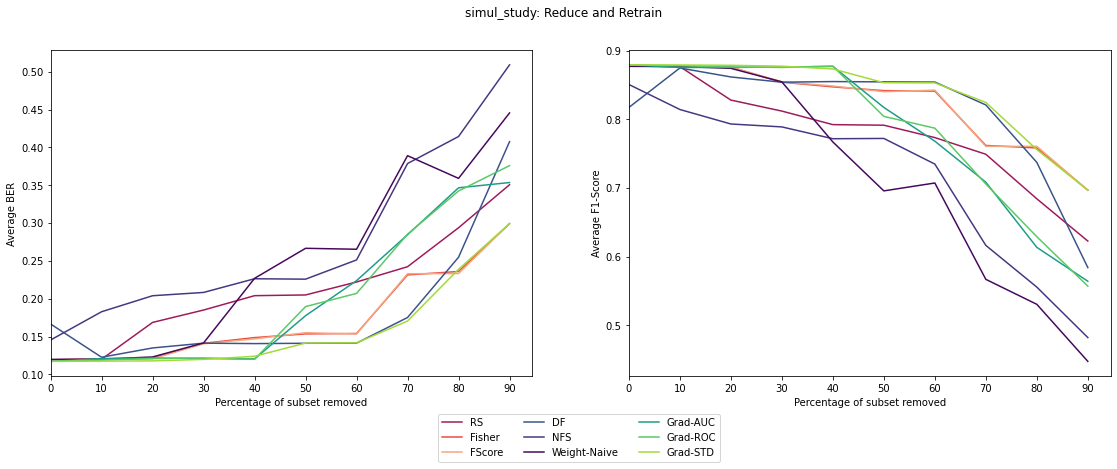

In [9]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")

plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
plt.suptitle("simul_study: Reduce and Retrain")


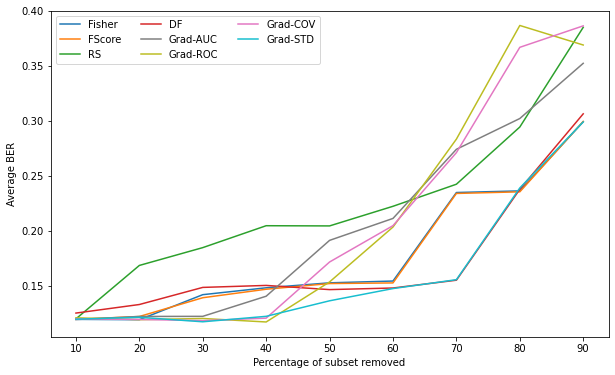

In [71]:
plt.figure(figsize=(10,6))
for i in dictionary_average_plt.keys():
    plt.plot( np.flip(dictionary_average_plt[i]), color=palette[colour[i]] )
    
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

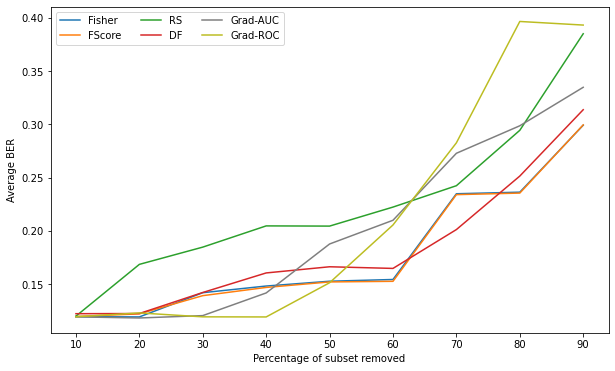

In [32]:
plt.figure(figsize=(10,6))
for i in dictionary_average_plt.keys():
    plt.plot( np.flip(dictionary_average_plt[i]), color=palette[colour[i]] )
    
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

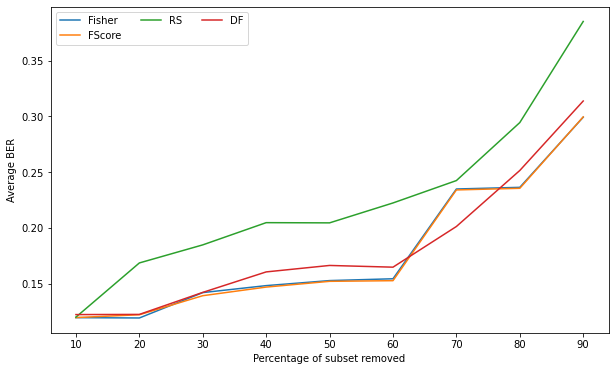

In [39]:
dictionary={}
for_range= range(90,0,-10)
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
for model_dir, model in [("Grad", "Grad-AUC"), ("Grad", "Grad-ROC")]:
    ber={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-ber.pkl", "rb")) ) )
#         print(pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb")))
#     print(np.array(ber))
    dictionary[model]= ber
#     dictionary[model]["colour"]= colour[model]
# dictionary

for model_dir, model in [("Grad", "Grad-AUC"), ("Grad", "Grad-ROC")]:
    ber={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/grad_sum/simul_study-subset-{model}-{percentage}-ber.pkl", "rb")) ) )
#         print(pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb")))
#     print(np.array(ber))
    dictionary[f"*{model}"]= ber


dictionary_average_plt={}
dictionary_average_sns={}
for i in dictionary.keys():
    average=[]
    for j in dictionary[i].keys():
        average.append(dictionary[i][j])
#     print(average)
    dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    dictionary_average_plt[i]= np.array(average).mean(axis=0)    
# dictionary_average

In [41]:
dictionary.keys(), dictionary_average_plt.keys()

(dict_keys(['Grad-AUC', 'Grad-ROC', '*Grad-AUC', '*Grad-ROC']),
 dict_keys(['Grad-AUC', 'Grad-ROC', '*Grad-AUC', '*Grad-ROC']))

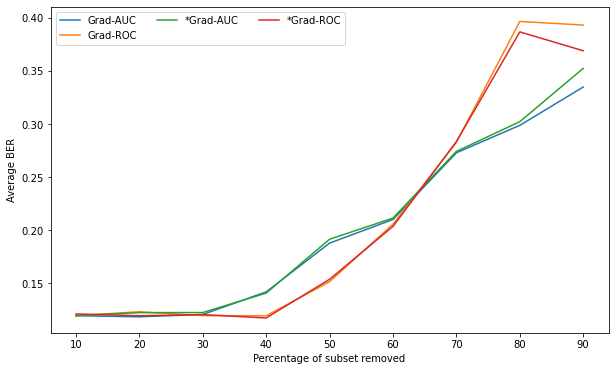

In [42]:
plt.figure(figsize=(10,6))
for i in dictionary_average_plt.keys():
    plt.plot( np.flip(dictionary_average_plt[i]))
    
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

In [53]:
import pandas as pd

plots=[]
for key, value in dictionary_average_sns.items():
    run=0
    data=[]
    for r in value:
        percentage=len(for_range)*10
        for p in r:
            data.append([run, percentage, p, key])
            percentage -= 10
        run += 1
    plots.append(pd.DataFrame(data, columns=['run', 'percentage', 'value', "method"]) )
# plot=pd.DataFrame(data, columns=['run', 'percentage', 'value'])
# plot

In [348]:
# plots= pd.concat(plots)
# plots

Text(0, 0.5, 'BER')

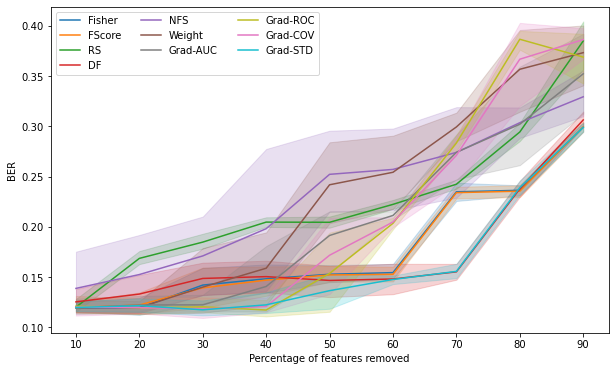

In [54]:
# legend_dict= {"Simul":"IE-Weight", "ThresholdedSimul":"IE-Weight-Thresholded", 
#               "RS":"RandomSelection", "DF":"DeepFeature", 
#               "Fisher":"FisherScore", "FScore":"FScore", 
#               "Grad-sum":"IE-Grad-sum", "Grad-std":"IE-Grad-std"}

# legend=[]
# for i in dictionary_average_plt.keys():
#     legend.append(legend_dict[i])

import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))

for i, c in zip(plots, [palette[colour[i]] for i in [z[1] for z in model_list]]):
    sns.lineplot(data=i, x='percentage', y='value', color=c)
# sns.lineplot(data=plots, x='percentage', y='value')
# sns.lineplot(data=plot1, x='percentage', y='value', sort=False )
# _=plt.xticks([i for i in range(10,80,10)],[i for i in range(70,0,-10)])
# plt.legend(dictionary_average_plt.keys(), ncol=4)
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
# plt.legend(legend)
plt.xlabel("Percentage of features removed")
plt.ylabel("BER")


## Ranking of Feature

In [19]:
import pickle
import numpy as np
grads= pickle.load(open("./experiments/simul_study/exp_log2/Grad/list/simul_study-Grad-list-100.pkl", "rb"))
grad_all= np.array(grads).reshape(100,-1,10)
grad_all.shape

(100, 9, 10)

In [20]:
epoch_mean=[]
epoch_std=[]
epoch_sum=[]

for epoch in grad_all:
    epoch_mean.append( epoch.mean(axis=0) )
    epoch_std.append( epoch.std(axis=0) )
    epoch_sum.append( epoch.sum(axis=0) )
    
epoch_mean= np.array(epoch_mean)
epoch_std= np.array(epoch_std)
epoch_sum= np.array(epoch_sum)

In [21]:
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]

In [49]:
len(channels)

10

## Grad sum over epochs

Text(0.5, 1.0, 'Abs. sum of gradients for each epoch')

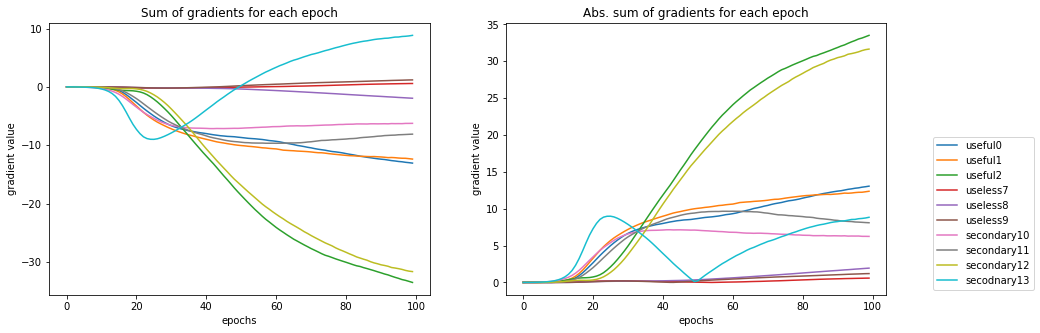

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
_=plt.plot(epoch_sum)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.5, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Sum of gradients for each epoch")

plt.subplot(122)
_=plt.plot(abs(epoch_sum))
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Abs. sum of gradients for each epoch")

Text(0.5, 1.0, 'Abs. sum of gradients for each epoch')

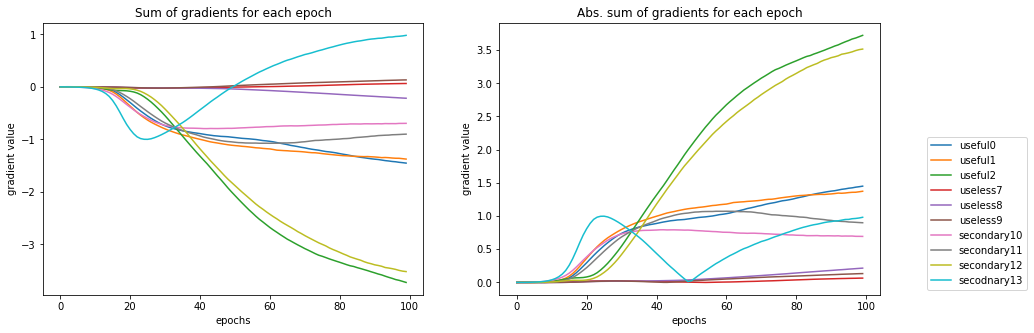

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
_=plt.plot(epoch_mean)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.5, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Sum of gradients for each epoch")

plt.subplot(122)
_=plt.plot(abs(epoch_mean))
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Abs. sum of gradients for each epoch")

### Area under curve
Higher the better

In [23]:
# Sum
dictionary={}
for idx, name in zip(range(len(channels)), channels):
    dictionary[name]= np.trapz(abs(epoch_sum[:, idx]))

def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('useful2', 1634.0757),
 ('secondary12', 1504.5367),
 ('useful1', 800.3209),
 ('useful0', 748.2274),
 ('secondary11', 657.031),
 ('secondary10', 530.84204),
 ('secodnary13', 475.98444),
 ('useless8', 61.005325),
 ('useless9', 40.857178),
 ('useless7', 18.632067)]

In [25]:
# Mean
dictionary={}
for idx, name in zip(range(len(channels)), channels):
    dictionary[name]= np.trapz(abs(epoch_sum[:, idx]))

def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('useful2', 1634.0757),
 ('secondary12', 1504.5367),
 ('useful1', 800.3209),
 ('useful0', 748.2274),
 ('secondary11', 657.031),
 ('secondary10', 530.84204),
 ('secodnary13', 475.98444),
 ('useless8', 61.005325),
 ('useless9', 40.857178),
 ('useless7', 18.632067)]

### Rate of Change

Text(0.5, 1.0, 'Rate of change for each epoch')

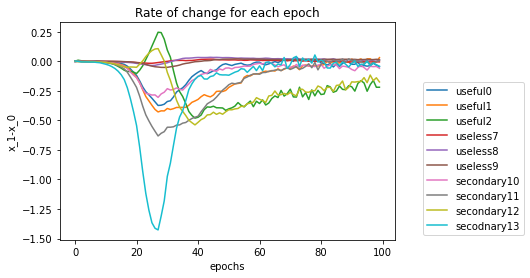

In [25]:
dictionary={}
for i in range(len(channels)):
    rolled= np.roll( epoch_sum[:, i], 1 )
    rolled[0]=0.
    diff= epoch_sum[:, i]-rolled
    dictionary[channels[i]]= np.trapz(abs(diff))
    plt.plot(diff)
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("x_1-x_0")
plt.title("Rate of change for each epoch")

Text(0.5, 1.0, 'Rate of change for each epoch')

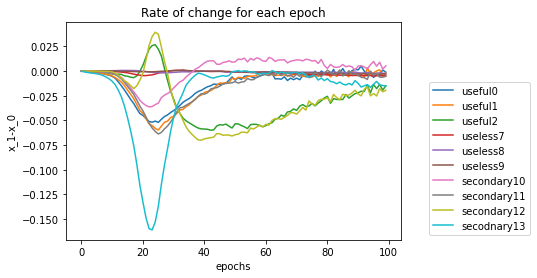

In [65]:
dictionary={}
for i in range(len(channels)):
    rolled= np.roll( epoch_mean[:, i], 1 )
    rolled[0]=0.
    diff= epoch_mean[:, i]-rolled
    dictionary[channels[i]]= np.trapz(abs(diff))
    plt.plot(diff)
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("x_1-x_0")
plt.title("Rate of change for each epoch")

In [26]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('useful2', 22.472775),
 ('secondary12', 22.102959),
 ('secodnary13', 20.884075),
 ('secondary11', 17.146389),
 ('useful1', 13.306934),
 ('secondary10', 8.027387),
 ('useful0', 7.1174374),
 ('useless8', 1.78658),
 ('useless9', 1.5474772),
 ('useless7', 0.65470695)]

In [66]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('secondary12', 3.3923616),
 ('useful2', 3.0706682),
 ('secodnary13', 2.328721),
 ('secondary11', 1.4473379),
 ('useful1', 1.4260219),
 ('useful0', 1.3660101),
 ('secondary10', 1.0228946),
 ('useless7', 0.21264304),
 ('useless9', 0.11020169),
 ('useless8', 0.0991445)]

## Covariance

In [22]:
import pandas as pd
pd.DataFrame( np.cov(epoch_sum.T), columns=channels, index=channels)

,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12,secodnary13
useful0,19.328089,20.686179,34.876742,1.708851,0.875235,0.742580,1.448616,21.133648,37.991585,30.483498
useful1,20.686179,22.171466,37.292378,1.816756,0.936394,0.789872,1.567022,22.658550,40.625637,32.552178
useful2,34.876742,37.292378,91.268040,4.399994,2.265625,2.230952,-5.768379,38.634122,98.670055,48.324584
useless7,1.708851,1.816756,4.399994,0.254327,0.120529,0.129728,-0.264854,1.869678,4.724721,2.598467
useless8,0.875235,0.936394,2.265625,0.120529,0.060017,0.061554,-0.138522,0.968473,2.438072,1.272498
useless9,0.742580,0.789872,2.230952,0.129728,0.061554,0.068936,-0.209628,0.818365,2.388302,1.073706
secondary10,1.448616,1.567022,-5.768379,-0.264854,-0.138522,-0.209628,2.596571,1.443545,-6.054607,4.249150
secondary11,21.133648,22.658550,38.634122,1.869678,0.968473,0.818365,1.443545,23.179642,42.078574,33.085360
secondary12,37.991585,40.625637,98.670055,4.724721,2.438072,2.388302,-6.054607,42.078574,106.742528,52.653044
secodnary13,30.483498,32.552178,48.324584,2.598467,1.272498,1.073706,4.249150,33.085360,52.653044,50.884513


In [23]:
print("Covariance above mean threshold")
pd.DataFrame(np.where( abs(np.cov(epoch_sum.T )) > abs(np.cov(epoch_sum.T )).mean(), np.cov(epoch_sum.T ), 0.), columns=channels, index=channels )

Covariance above mean threshold


,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12,secodnary13
useful0,19.328089,20.686179,34.876742,0.0,0.0,0.0,0.0,21.133648,37.991585,30.483498
useful1,20.686179,22.171466,37.292378,0.0,0.0,0.0,0.0,22.658550,40.625637,32.552178
useful2,34.876742,37.292378,91.268040,0.0,0.0,0.0,0.0,38.634122,98.670055,48.324584
useless7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
useless8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
useless9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
secondary10,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
secondary11,21.133648,22.658550,38.634122,0.0,0.0,0.0,0.0,23.179642,42.078574,33.085360
secondary12,37.991585,40.625637,98.670055,0.0,0.0,0.0,0.0,42.078574,106.742528,52.653044
secodnary13,30.483498,32.552178,48.324584,0.0,0.0,0.0,0.0,33.085360,52.653044,50.884513


In [41]:
def process_link(array, threshold, channels, function, transpose=True):
    
    link={}
    for i in channels:
        link[i]=[]
        
    if transpose:
        array= array.T

    i=0; j=0; skip_condition=0
    print("Threshold: ", threshold)
    print()
    for row in np.where( abs(function(array)) > threshold, function(array), 0):
        
        for column in row:
            if i==j:
                j+=1
                continue
            
            if abs(column) > threshold and column != 1.:
#                 print(f"value: {round(column,3)}, {channels[i]} {channels[j]}")
    #             dictionary[f"{channels[i]}-{channels[j]}"]= round(column,3)
                link[channels[i]].append(channels[j])
#                 print(f"{channels[i]} {channels[j]} {column} {j}")
            j+=1
                
                
#             print("j", j, "i", i, column)
#             if j==skip_condition:
#                 skip_condition += 1
#                 j+= 1
#                 continue # pass

#             if abs(column) > threshold and column != 1.:
#                 print(f"coef: {round(column,3)}, {channels[i]} {channels[j]}")
#     #             dictionary[f"{channels[i]}-{channels[j]}"]= round(column,3)
#                 link[channels[i]].append(channels[j])
#     #             print(f"{channels[i]} {channels[j]} {column}")
#             j+=1
        i+=1
        j=0
        
    return link
link= process_link(epoch_sum, abs(np.cov(epoch_sum.T)).mean(), channels, np.cov)
print()
for k, v in link.items():
    print(k,v)
    print(k, len(v))
    print()

Threshold:  16.10795740224862


useful0 ['useful1', 'useful2', 'secondary11', 'secondary12', 'secodnary13']
useful0 5

useful1 ['useful0', 'useful2', 'secondary11', 'secondary12', 'secodnary13']
useful1 5

useful2 ['useful0', 'useful1', 'secondary11', 'secondary12', 'secodnary13']
useful2 5

useless7 []
useless7 0

useless8 []
useless8 0

useless9 []
useless9 0

secondary10 []
secondary10 0

secondary11 ['useful0', 'useful1', 'useful2', 'secondary12', 'secodnary13']
secondary11 5

secondary12 ['useful0', 'useful1', 'useful2', 'secondary11', 'secodnary13']
secondary12 5

secodnary13 ['useful0', 'useful1', 'useful2', 'secondary11', 'secondary12']
secodnary13 5



### Amount of link for Covariance

In [42]:
def link_sort(x):
    return len(x[1])
[ (i[0], len(i[1])) for i in sorted(link.items(), key=link_sort, reverse=True) ]

[('useful0', 5),
 ('useful1', 5),
 ('useful2', 5),
 ('secondary11', 5),
 ('secondary12', 5),
 ('secodnary13', 5),
 ('useless7', 0),
 ('useless8', 0),
 ('useless9', 0),
 ('secondary10', 0)]

In [24]:
def process_cov(array, threshold, channels, dictionary={}, transpose=True):

    for i in channels:
        dictionary[i]=0
    
    i=0; j=0; 
    print("Threshold: ", threshold)
    print()
    
    if transpose:
        array= array.T
    
    for row in np.where( abs(np.cov(array)) > threshold, np.cov(array), 0):
        for column in row:
#             print("j", j, "i", i)
#             print("skip_condition", skip_condition)
#             print()
            if j==i:
                break

            if abs(column) > threshold and column != 1:
                print(f"cov: {round(column,3)}, {channels[i]} {channels[j]}")
                dictionary[channels[i]] += abs(column)
                dictionary[channels[j]] += abs(column)
            j+=1
        i+=1
        j=0
        
    return dictionary

dictionary= process_cov(epoch_sum, abs(np.cov(epoch_sum.T )).mean(), channels)

Threshold:  16.10795740224862

cov: 20.686, useful1 useful0
cov: 34.877, useful2 useful0
cov: 37.292, useful2 useful1
cov: 21.134, secondary11 useful0
cov: 22.659, secondary11 useful1
cov: 38.634, secondary11 useful2
cov: 37.992, secondary12 useful0
cov: 40.626, secondary12 useful1
cov: 98.67, secondary12 useful2
cov: 42.079, secondary12 secondary11
cov: 30.483, secodnary13 useful0
cov: 32.552, secodnary13 useful1
cov: 48.325, secodnary13 useful2
cov: 33.085, secodnary13 secondary11
cov: 52.653, secodnary13 secondary12


In [67]:
dictionary= process_cov(epoch_mean, abs(np.cov(epoch_mean.T )).mean(), channels)

Threshold:  0.19886367152677908



### Covariance magnitude with respect to their links

In [25]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('secondary12', 272.01889461542254),
 ('useful2', 257.7978803840988),
 ('secodnary13', 197.0986623197386),
 ('secondary11', 157.59025273927026),
 ('useful1', 153.81492140412817),
 ('useful0', 145.17165161826313),
 ('useless7', 0),
 ('useless8', 0),
 ('useless9', 0),
 ('secondary10', 0)]

In [68]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('secondary12', 3.35825795585393),
 ('useful2', 3.1826898813238245),
 ('secodnary13', 2.433316822349807),
 ('secondary11', 1.9455586755104064),
 ('useful1', 1.8989496363669434),
 ('useful0', 1.7922426074812334),
 ('useless7', 0),
 ('useless8', 0),
 ('useless9', 0),
 ('secondary10', 0)]

## Standard Deviation

In [12]:
epoch_sum[:, i].shape

(100,)

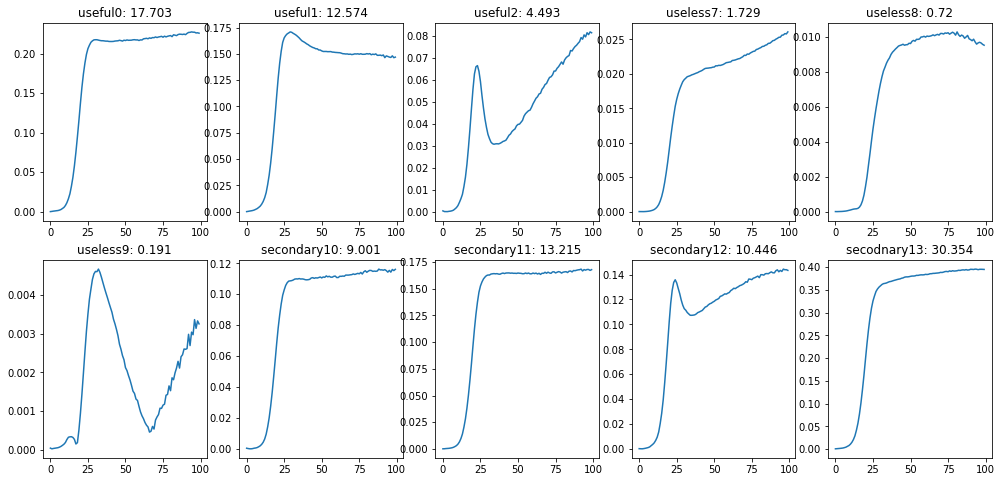

In [172]:
# higher the better, by definition, std will be greater if value achieved is greater
std_dict={}
plt.figure(figsize=(17,8))
for i, j in zip(range(len(channels)), channels):
    plt.subplot(2,5,i+1)
    std= ( epoch_std[:,i] ) 
    _= plt.plot( std )
    value= round( np.trapz(epoch_std[:, i]), 3 )# AuC
    std_dict[j]=value 
#     value= round((std.std() ), 3) 
    plt.title(f"{j}: {str(value)}")

In [21]:
def dictionary_sort(x):
    return x[1]
sorted(std_dict.items(), key=dictionary_sort, reverse=True)

[('useful0', 17.703),
 ('secondary11', 13.215),
 ('useful1', 12.574),
 ('secondary12', 10.446),
 ('secondary10', 9.001),
 ('useful2', 4.493),
 ('useless7', 1.729),
 ('useless8', 0.72),
 ('useless9', 0.191)]

### Coefficient of variation

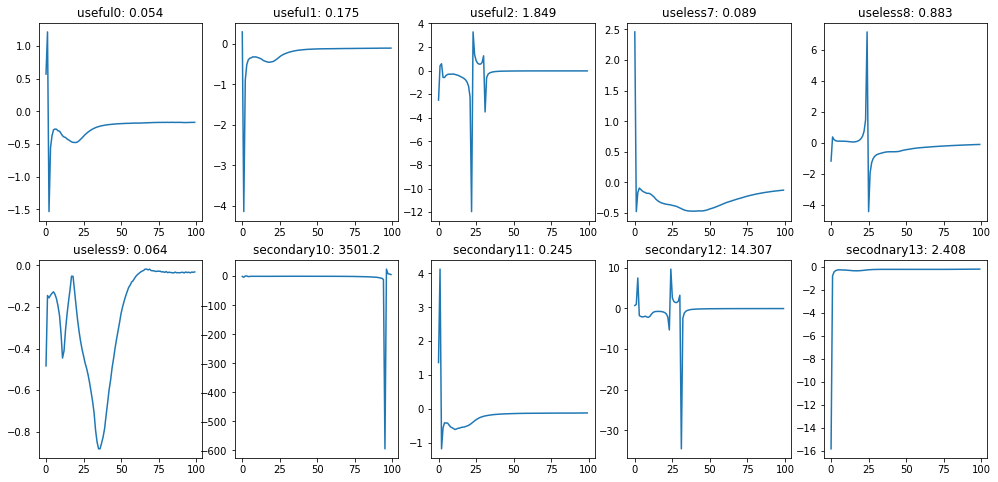

In [175]:
# high: high std relative to the mean
# low: low std relative to the mean <--consistent low std relative to mean

rstd_dict={}
plt.figure(figsize=(17,8))
epoch_rstd= []
for i, j in zip(range(len(channels)), channels):
    plt.subplot(2,5,i+1)
    rstd= epoch_std[:,i] / epoch_mean[:,i]# std-mean ratio per epochs
    
#     q1,q3= np.percentile(rstd, [10,90])
    
#     rstd= rstd[(rstd <= q3) & (rstd >= q1)] # removal of outlier, 20% 
    
    epoch_rstd.append(rstd)
    _= plt.plot( rstd )
    value= round((rstd.var() ), 3) # Variance for the coef of variation, not as severely affected by outliers
#     value= round( np.trapz(abs(rstd)), 3 )# AuC, affected by outliers
    rstd_dict[j]=value
    plt.title(f"{j}: {str(value)}")
    
epoch_rstd= np.array(epoch_rstd)

In [177]:
def dictionary_sort(x):
    return x[1]
sorted(rstd_dict.items(), key=dictionary_sort, reverse=True)

[('secondary10', 3501.2),
 ('secondary12', 14.307),
 ('secodnary13', 2.408),
 ('useful2', 1.849),
 ('useless8', 0.883),
 ('secondary11', 0.245),
 ('useful1', 0.175),
 ('useless7', 0.089),
 ('useless9', 0.064),
 ('useful0', 0.054)]

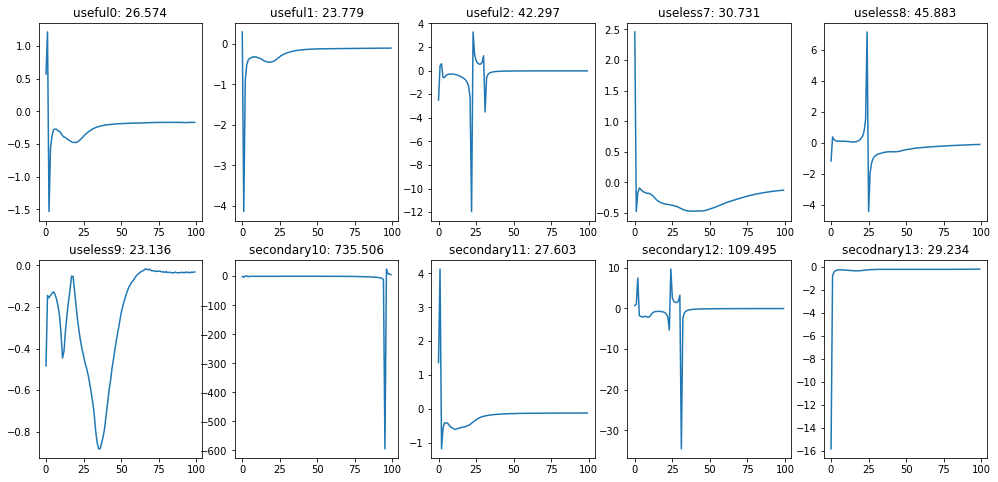

In [178]:
# high: high std
# low: low std
rstd_dict={}
plt.figure(figsize=(17,8))
epoch_rstd= []
for i, j in zip(range(len(channels)), channels):
    plt.subplot(2,5,i+1)
    rstd= epoch_std[:,i] / epoch_mean[:,i]# std-mean ratio per epochs
    
#     q1,q3= np.percentile(rstd, [5,95])
    
# #     rstd= rstd[(rstd <= q3) & (rstd >= q1)]
#     rstd= np.where( (rstd <= q3) & (rstd >= q1), rstd, 0 ) # removal of outlier, 20% 
    
    epoch_rstd.append(rstd)
    _= plt.plot( rstd )
#     value= round((rstd.var() ), 3) # Variance for the coef of variation
    value= round( np.trapz(abs(rstd)), 3 )# AuC, affected by outliers
    rstd_dict[j]=value
    plt.title(f"{j}: {str(value)}")
    
epoch_rstd= np.array(epoch_rstd)

In [179]:
def dictionary_sort(x):
    return x[1]
sorted(rstd_dict.items(), key=dictionary_sort, reverse=True)

[('secondary10', 735.506),
 ('secondary12', 109.495),
 ('useless8', 45.883),
 ('useful2', 42.297),
 ('useless7', 30.731),
 ('secodnary13', 29.234),
 ('secondary11', 27.603),
 ('useful0', 26.574),
 ('useful1', 23.779),
 ('useless9', 23.136)]

In [46]:
len(channels)

10

In [47]:
epoch_rstd.shape

(9, 100)

### Rstd Corr Coeff

In [33]:
import pandas as pd
print("Correlation Coeffs between the coef of variation from the batches of each epoch for each channel")
pd.DataFrame(np.corrcoef(epoch_rstd), columns=channels, index= channels)

Correlation Coeffs between the mean gradient from the batches of each epoch for each channel


,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12,secodnary13
useful0,1.000000,0.968229,0.848213,0.034910,-0.233712,0.300861,-0.241330,0.859155,0.801253,0.943866
useful1,0.968229,1.000000,0.930633,-0.078680,-0.350362,0.252367,-0.191992,0.934942,0.905382,0.949142
useful2,0.848213,0.930633,1.000000,-0.244308,-0.568000,0.197009,-0.038001,0.888072,0.980030,0.894372
useless7,0.034910,-0.078680,-0.244308,1.000000,0.729543,0.730280,-0.724436,-0.210128,-0.230670,-0.146922
useless8,-0.233712,-0.350362,-0.568000,0.729543,1.000000,0.328160,-0.372681,-0.496916,-0.513183,-0.494315
useless9,0.300861,0.252367,0.197009,0.730280,0.328160,1.000000,-0.456055,0.151962,0.194350,0.173082
secondary10,-0.241330,-0.191992,-0.038001,-0.724436,-0.372681,-0.456055,1.000000,-0.158905,-0.030250,-0.198056
secondary11,0.859155,0.934942,0.888072,-0.210128,-0.496916,0.151962,-0.158905,1.000000,0.851934,0.911787
secondary12,0.801253,0.905382,0.980030,-0.230670,-0.513183,0.194350,-0.030250,0.851934,1.000000,0.824281
secodnary13,0.943866,0.949142,0.894372,-0.146922,-0.494315,0.173082,-0.198056,0.911787,0.824281,1.000000


In [34]:
def process_corrcoef(array, threshold, channels, transpose=True):
    dictionary={}

    i=0; j=0; skip_condition=0
    print("Threshold: ", threshold)
    print()
    
    if transpose:
        array= array.T
    
    for row in np.where( np.corrcoef(array) > threshold, np.corrcoef(array), 0):
        for column in row:
#             print("j", j, "i", i)
#             print("skip_condition", skip_condition)
#             print()
            if j==skip_condition:
                skip_condition += 1
                break

            if abs(column) > threshold and column != 1:
                print(f"coef: {round(column,3)}, {channels[i]} {channels[j]}")
                dictionary[f"{channels[i]}-{channels[j]}"]= round(column,3)
            j+=1
        i+=1
        j=0
        
    return dictionary

dictionary= process_corrcoef(epoch_rstd, abs(np.corrcoef(epoch_rstd)).mean(), channels, transpose=False)

Threshold:  0.5512543512738866

coef: 0.968, useful1 useful0
coef: 0.848, useful2 useful0
coef: 0.931, useful2 useful1
coef: 0.73, useless8 useless7
coef: 0.73, useless9 useless7
coef: 0.859, secondary11 useful0
coef: 0.935, secondary11 useful1
coef: 0.888, secondary11 useful2
coef: 0.801, secondary12 useful0
coef: 0.905, secondary12 useful1
coef: 0.98, secondary12 useful2
coef: 0.852, secondary12 secondary11
coef: 0.944, secodnary13 useful0
coef: 0.949, secodnary13 useful1
coef: 0.894, secodnary13 useful2
coef: 0.912, secodnary13 secondary11
coef: 0.824, secodnary13 secondary12


In [35]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('secondary12-useful2', 0.98),
 ('useful1-useful0', 0.968),
 ('secodnary13-useful1', 0.949),
 ('secodnary13-useful0', 0.944),
 ('secondary11-useful1', 0.935),
 ('useful2-useful1', 0.931),
 ('secodnary13-secondary11', 0.912),
 ('secondary12-useful1', 0.905),
 ('secodnary13-useful2', 0.894),
 ('secondary11-useful2', 0.888),
 ('secondary11-useful0', 0.859),
 ('secondary12-secondary11', 0.852),
 ('useful2-useful0', 0.848),
 ('secodnary13-secondary12', 0.824),
 ('secondary12-useful0', 0.801),
 ('useless8-useless7', 0.73),
 ('useless9-useless7', 0.73)]

In [36]:
ranking={}
for i in channels:
    ranking[i]=0
count=1
for k, v in sorted(dictionary.items(), key=dictionary_sort):
    f1, f2=k.split("-")
    ranking[f1] += v#count
    ranking[f2] += v#count
    count += 1
    
sorted(ranking.items(), key=dictionary_sort, reverse=True)

[('useful1', 4.688),
 ('useful2', 4.541),
 ('secodnary13', 4.523),
 ('secondary11', 4.446),
 ('useful0', 4.42),
 ('secondary12', 4.362),
 ('useless7', 1.46),
 ('useless8', 0.73),
 ('useless9', 0.73),
 ('secondary10', 0)]

In [39]:
link= process_link(epoch_rstd, abs(np.corrcoef(epoch_rstd)).mean(), channels, np.corrcoef, transpose=False)
for k, v in link.items():
    print(k,v)
    print(k, len(v))
    print()

Threshold:  0.5512543512738866

useful0 ['useful1', 'useful2', 'secondary11', 'secondary12', 'secodnary13']
useful0 5

useful1 ['useful0', 'useful2', 'secondary11', 'secondary12', 'secodnary13']
useful1 5

useful2 ['useful0', 'useful1', 'useless8', 'secondary11', 'secondary12', 'secodnary13']
useful2 6

useless7 ['useless8', 'useless9', 'secondary10']
useless7 3

useless8 ['useful2', 'useless7']
useless8 2

useless9 ['useless7']
useless9 1

secondary10 ['useless7']
secondary10 1

secondary11 ['useful0', 'useful1', 'useful2', 'secondary12', 'secodnary13']
secondary11 5

secondary12 ['useful0', 'useful1', 'useful2', 'secondary11', 'secodnary13']
secondary12 5

secodnary13 ['useful0', 'useful1', 'useful2', 'secondary11', 'secondary12']
secodnary13 5



In [40]:
def link_sort(x):
    return len(x[1])
[ (i[0], len(i[1])) for i in sorted(link.items(), key=link_sort, reverse=True) ]

[('useful2', 6),
 ('useful0', 5),
 ('useful1', 5),
 ('secondary11', 5),
 ('secondary12', 5),
 ('secodnary13', 5),
 ('useless7', 3),
 ('useless8', 2),
 ('useless9', 1),
 ('secondary10', 1)]

In [43]:
import pandas as pd
print("Correlation Coeffs between the sum of gradients from the batches of each epoch for each channel")
pd.DataFrame(np.corrcoef(epoch_sum.T), columns=channels, index= channels)

Correlation Coeffs between the mean gradient from the batches of each epoch for each channel


,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12,secodnary13
useful0,1.000000,0.999283,0.830390,0.770750,0.812630,0.643320,0.204484,0.998451,0.836420,0.972025
useful1,0.999283,1.000000,0.829017,0.765074,0.811753,0.638907,0.206527,0.999497,0.835092,0.969148
useful2,0.830390,0.829017,1.000000,0.913265,0.968035,0.889424,-0.374709,0.839959,0.999671,0.709114
useless7,0.770750,0.765074,0.913265,1.000000,0.975571,0.979753,-0.325920,0.770048,0.906800,0.722318
useless8,0.812630,0.811753,0.968035,0.975571,1.000000,0.956968,-0.350899,0.821101,0.963253,0.728160
useless9,0.643320,0.638907,0.889424,0.979753,0.956968,1.000000,-0.495481,0.647399,0.880438,0.573285
secondary10,0.204484,0.206527,-0.374709,-0.325920,-0.350899,-0.495481,1.000000,0.186070,-0.363678,0.369666
secondary11,0.998451,0.999497,0.839959,0.770048,0.821101,0.647399,0.186070,1.000000,0.845939,0.963362
secondary12,0.836420,0.835092,0.999671,0.906800,0.963253,0.880438,-0.363678,0.845939,1.000000,0.714434
secodnary13,0.972025,0.969148,0.709114,0.722318,0.728160,0.573285,0.369666,0.963362,0.714434,1.000000


In [44]:
threshold= abs(np.corrcoef(epoch_sum.T)).mean()
pd.DataFrame(np.where( np.corrcoef(epoch_sum.T) > threshold, np.corrcoef(epoch_sum.T), 0), columns=channels, index= channels)
# more entries (more correlation), the less likely for the group to all be required

,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12,secodnary13
useful0,1.000000,0.999283,0.830390,0.770750,0.812630,0.000000,0.0,0.998451,0.836420,0.972025
useful1,0.999283,1.000000,0.829017,0.000000,0.811753,0.000000,0.0,0.999497,0.835092,0.969148
useful2,0.830390,0.829017,1.000000,0.913265,0.968035,0.889424,0.0,0.839959,0.999671,0.000000
useless7,0.770750,0.000000,0.913265,1.000000,0.975571,0.979753,0.0,0.770048,0.906800,0.000000
useless8,0.812630,0.811753,0.968035,0.975571,1.000000,0.956968,0.0,0.821101,0.963253,0.000000
useless9,0.000000,0.000000,0.889424,0.979753,0.956968,1.000000,0.0,0.000000,0.880438,0.000000
secondary10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
secondary11,0.998451,0.999497,0.839959,0.770048,0.821101,0.000000,0.0,1.000000,0.845939,0.963362
secondary12,0.836420,0.835092,0.999671,0.906800,0.963253,0.880438,0.0,0.845939,1.000000,0.000000
secodnary13,0.972025,0.969148,0.000000,0.000000,0.000000,0.000000,0.0,0.963362,0.000000,1.000000


In [45]:
dictionary= process_corrcoef(epoch_sum, abs(np.corrcoef(epoch_sum.T)).mean(), channels)

Threshold:  0.7671497554223906

coef: 0.999, useful1 useful0
coef: 0.83, useful2 useful0
coef: 0.829, useful2 useful1
coef: 0.771, useless7 useful0
coef: 0.913, useless7 useful2
coef: 0.813, useless8 useful0
coef: 0.812, useless8 useful1
coef: 0.968, useless8 useful2
coef: 0.976, useless8 useless7
coef: 0.889, useless9 useful2
coef: 0.98, useless9 useless7
coef: 0.957, useless9 useless8
coef: 0.998, secondary11 useful0
coef: 0.999, secondary11 useful1
coef: 0.84, secondary11 useful2
coef: 0.77, secondary11 useless7
coef: 0.821, secondary11 useless8
coef: 0.836, secondary12 useful0
coef: 0.835, secondary12 useful1
coef: 1.0, secondary12 useful2
coef: 0.907, secondary12 useless7
coef: 0.963, secondary12 useless8
coef: 0.88, secondary12 useless9
coef: 0.846, secondary12 secondary11
coef: 0.972, secodnary13 useful0
coef: 0.969, secodnary13 useful1
coef: 0.963, secodnary13 secondary11


### The higher the rank, the more likely it is correlated with some other feature,

In [46]:
ranking={}
for i in channels:
    ranking[i]=0
count=1
for k, v in sorted(dictionary.items(), key=dictionary_sort):
    f1, f2=k.split("-")
    ranking[f1] += v#count
    ranking[f2] += v#count
    count += 1
    
sorted(ranking.items(), key=dictionary_sort, reverse=True)

[('useless8', 6.31),
 ('useful2', 6.269),
 ('secondary12', 6.267),
 ('secondary11', 6.237),
 ('useful0', 6.218999999999999),
 ('useful1', 5.443),
 ('useless7', 5.317),
 ('useless9', 3.706),
 ('secodnary13', 2.904),
 ('secondary10', 0)]

In [47]:
link= process_link(epoch_sum, abs(np.corrcoef(epoch_sum.T)).mean(), channels, np.corrcoef)
print()
for k, v in link.items():
    print(k,v)
    print(k, len(v))
    print()

Threshold:  0.7671497554223906


useful0 ['useful1', 'useful2', 'useless7', 'useless8', 'secondary11', 'secondary12', 'secodnary13']
useful0 7

useful1 ['useful0', 'useful2', 'useless8', 'secondary11', 'secondary12', 'secodnary13']
useful1 6

useful2 ['useful0', 'useful1', 'useless7', 'useless8', 'useless9', 'secondary11', 'secondary12']
useful2 7

useless7 ['useful0', 'useful2', 'useless8', 'useless9', 'secondary11', 'secondary12']
useless7 6

useless8 ['useful0', 'useful1', 'useful2', 'useless7', 'useless9', 'secondary11', 'secondary12']
useless8 7

useless9 ['useful2', 'useless7', 'useless8', 'secondary12']
useless9 4

secondary10 []
secondary10 0

secondary11 ['useful0', 'useful1', 'useful2', 'useless7', 'useless8', 'secondary12', 'secodnary13']
secondary11 7

secondary12 ['useful0', 'useful1', 'useful2', 'useless7', 'useless8', 'useless9', 'secondary11']
secondary12 7

secodnary13 ['useful0', 'useful1', 'secondary11']
secodnary13 3



### Amount of correlation links

In [48]:
def link_sort(x):
    return len(x[1])
[ (i[0], len(i[1])) for i in sorted(link.items(), key=link_sort, reverse=True) ]

[('useful0', 7),
 ('useful2', 7),
 ('useless8', 7),
 ('secondary11', 7),
 ('secondary12', 7),
 ('useful1', 6),
 ('useless7', 6),
 ('useless9', 4),
 ('secodnary13', 3),
 ('secondary10', 0)]

## Z-score between channels

In [148]:
import scipy.stats as st
dictionary={}
for i in channels:
    dictionary[i]=0

i=0; j=0; 
matrix=[]
for i in range(len(channels)):
    row=[]
    for j in range(len(channels)):
        
        if j==i:
            break
#             j+=1; row.append(0)
#             continue
        z_scores= ( epoch_mean[:, i] - epoch_mean[:, j] ) / np.sqrt( ( epoch_std[:, i] + epoch_std[:, j] ) / len(epoch_mean) )
#         print(f"channels: {channels[i]}-{channels[j]}")
#         row.append(z_scores.mean()) 
#         print(np.array( st.norm.cdf(z_scores) ).mean() )
        row.append(np.array( st.norm.cdf(z_scores) ).mean())
        j+=1
    matrix.append(row)
    i+=1
    j=0

        

In [73]:
pd.DataFrame(matrix, index=channels, columns=channels[:-1])
# z scores

,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12
useful0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful1,-0.662377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful2,-4.223659,-4.155092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useless7,17.198486,21.108393,37.379467,NaN,NaN,NaN,NaN,NaN,NaN
useless8,18.566271,22.982353,42.404213,2.551603,NaN,NaN,NaN,NaN,NaN
useless9,18.888041,23.549889,45.255173,2.889045,0.018790,NaN,NaN,NaN,NaN
secondary10,12.206768,14.472398,22.200830,-3.957328,-5.389728,-5.548597,NaN,NaN,NaN
secondary11,-0.397713,0.257934,4.118682,-20.161873,-21.928520,-22.423616,-13.842343,NaN,NaN
secondary12,-5.806205,-5.859218,-2.632244,-30.280083,-32.795788,-33.795326,-21.157293,-5.841954,NaN
secodnary13,-9.171100,-9.149460,-7.478354,-24.606514,-25.700834,-25.939672,-20.156456,-9.328606,-5.230184


In [118]:
pd.DataFrame(matrix, index=channels, columns=channels[:-1])
# probability of z-score
# closer to 0.5 = similiar, further away = difference
# symmetrical 0.1 is relative to 0.9, just in different directions

,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12
useful0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful1,0.290199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful2,0.498211,0.512355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useless7,0.976654,0.976058,0.843993,NaN,NaN,NaN,NaN,NaN,NaN
useless8,0.978111,0.977915,0.879767,0.949970,NaN,NaN,NaN,NaN,NaN
useless9,0.975858,0.975040,0.865950,0.930645,0.534123,NaN,NaN,NaN,NaN
secondary10,0.970790,0.965331,0.673226,0.280828,0.199173,0.207644,NaN,NaN,NaN
secondary11,0.363863,0.586298,0.525637,0.040069,0.031918,0.039402,0.091298,NaN,NaN
secondary12,0.469152,0.481545,0.169028,0.158287,0.125530,0.138773,0.322775,0.445194,NaN
secodnary13,0.028145,0.025233,0.316712,0.012999,0.012521,0.013602,0.014398,0.016049,0.364691


In [140]:
st.norm.cdf(2.0), st.norm.cdf(2.5), st.norm.cdf(3.0),st.norm.cdf(3.5)

(0.9772498680518208,
 0.9937903346742238,
 0.9986501019683699,
 0.9997673709209645)

In [145]:
1-st.norm.cdf(2.0), 1-st.norm.cdf(2.5), 1-st.norm.cdf(3.0), 1-st.norm.cdf(3.5)

(0.02275013194817921,
 0.006209665325776159,
 0.0013498980316301035,
 0.0002326290790355401)

In [119]:
q1, q3= np.percentile(np.concatenate(matrix), [25,75])
q1, q3

(0.12553031113127, 0.8659499585706206)

In [120]:
thresholded_matrix= np.where( (np.concatenate(matrix) < q3) & (np.concatenate(matrix) > q1), np.concatenate(matrix), 0 )

In [149]:
i=1; j=0
count=0
link={}
for c in channels:
    link[c]=[]
    
# q1, q3= np.percentile(np.concatenate(matrix), [25,75])
q1= 1- st.norm.cdf(2.0); q3= st.norm.cdf(2.0) # recommended qualitative measure
thresholded_matrix= np.where( (np.concatenate(matrix) < q3) & (np.concatenate(matrix) > q1), np.concatenate(matrix), 0 )
# thresholded_matrix= np.concatenate(matrix)

while j<i & i<len(channels):
    matrix[i][j]= thresholded_matrix[count]
    if thresholded_matrix[count] != 0:
        link[channels[i]].append(channels[j])
        link[channels[j]].append(channels[i])
    j+=1; count +=1
    if i==j:
        j=0
        i+=1

In [150]:
pd.DataFrame(matrix, index=channels, columns=channels[:-1])

,useful0,useful1,useful2,useless7,useless8,useless9,secondary10,secondary11,secondary12
useful0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful1,0.290199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful2,0.498211,0.512355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useless7,0.976654,0.976058,0.843993,NaN,NaN,NaN,NaN,NaN,NaN
useless8,0.000000,0.000000,0.879767,0.949970,NaN,NaN,NaN,NaN,NaN
useless9,0.975858,0.975040,0.865950,0.930645,0.534123,NaN,NaN,NaN,NaN
secondary10,0.970790,0.965331,0.673226,0.280828,0.199173,0.207644,NaN,NaN,NaN
secondary11,0.363863,0.586298,0.525637,0.040069,0.031918,0.039402,0.091298,NaN,NaN
secondary12,0.469152,0.481545,0.169028,0.158287,0.125530,0.138773,0.322775,0.445194,NaN
secodnary13,0.028145,0.025233,0.316712,0.000000,0.000000,0.000000,0.000000,0.000000,0.364691


In [151]:
def link_sort(x):
    return len(x[1])
[ (i[0], len(i[1])) for i in sorted(link.items(), key=link_sort, reverse=True) ]


[('useful2', 9),
 ('secondary12', 9),
 ('useful0', 8),
 ('useful1', 8),
 ('useless7', 8),
 ('useless9', 8),
 ('secondary10', 8),
 ('secondary11', 8),
 ('useless8', 6),
 ('secodnary13', 4)]

## std

In [42]:
grads= pickle.load(open("./experiments/Benchmark/exp_log0/grad_list/benchmark-IE-grad-lung_small-grads_list-200.pkl", "rb"))
grads= np.array(grads).std(axis=1)

Text(0, 0.5, 'Value')

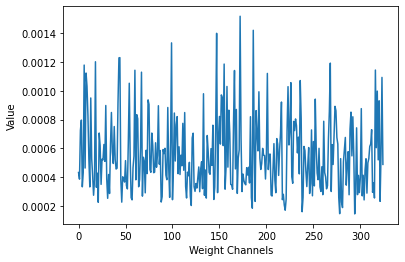

In [43]:
plt.plot(grads)
plt.xlabel("Weight Channels")
plt.ylabel("Value")

Text(0, 0.5, 'Value')

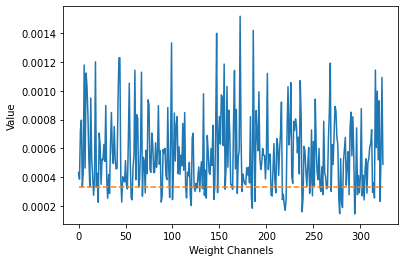

In [49]:
q= np.percentile(grads, [20])
plt.plot(grads)
plt.plot([q for i in range(len(grads))], '--')
plt.xlabel("Weight Channels")
plt.ylabel("Value")

In [42]:
np.count_nonzero(grads > q), np.count_nonzero(grads > q) / len(grads)

(292, 0.8984615384615384)

## Performance Retention

In [1]:
import pickle
import numpy as np

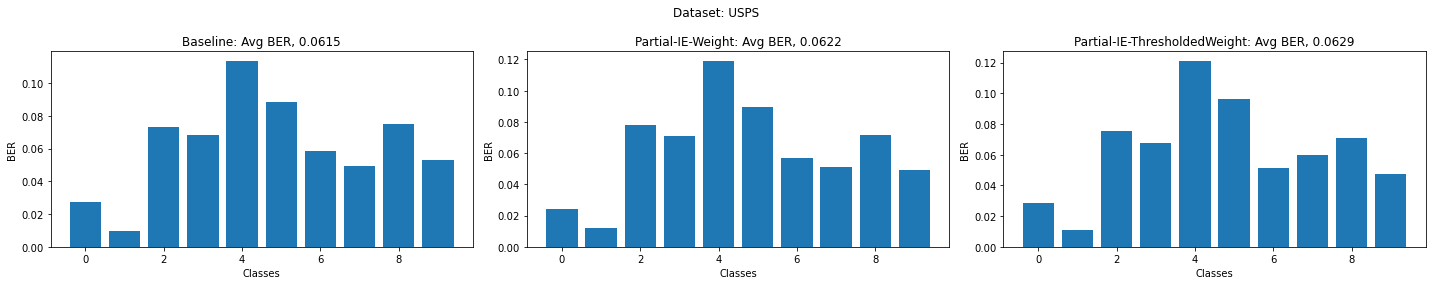

In [89]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(1,3)
i=0; j=0
folder_dict={"Baseline":"Baseline", 
             "Phases-Weight":"Phases",
             "Phases-ThresholdedWeight":"Phases"} #model: folder

dict_name= {"Baseline":"Baseline", "Phases-Weight":"Partial-IE-Weight", "Phases-ThresholdedWeight":"Partial-IE-ThresholdedWeight"}

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    axes[j].bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    axes[j].set_title(dict_name[model]+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

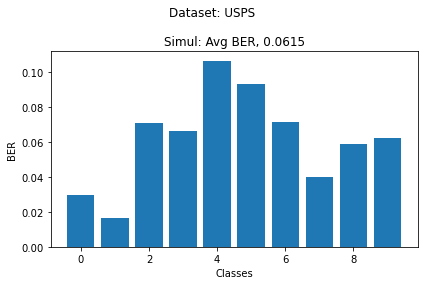

In [549]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

# fig, axes= plt.subplots(1,3)
fig= plt.figure()
i=0; j=0
dataset= "USPS"
folder_dict={"Weight":"Weight"} #model: folder


plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
# fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    plt.bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    plt.title(model+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    plt.xlabel("Classes")
    plt.ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Captum xAI methods

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

In [ ]:
from utilities.SimulationStudyDataset import SimulationStudyDataset

data=SimulationStudyDataset(split=config["split"], default_path=default_path)
classes=data.classes
logging.info("Done")

train_dataloader= torch.utils.data.DataLoader(data.return_training_dataset(), batch_size=config["batch_size"])
val_dataloader= torch.utils.data.DataLoader(data.return_validation_dataset(), batch_size=config["batch_size"])

In [ ]:
import Models.SimulationStudyBaseline_Model import SimulationStudyBaseline_Model

model= SimulationStudyBaseline_Model.SimulationStudyBaseline_Model(device=DEVICE).to(DEVICE)

exp=

model.load_state(f"./experiment/simul_study/exp_log{exp}/Baseline/state_dict/simul_study-Baseline-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/DF/state_dict/simul_study-DF-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/NFS/state_dict/simul_study-NFS-state_dict-100.pt")

model.load_state(f"./experiment/simul_study/exp_log{exp}/Weight/state_dict/simul_study-Weight-state_dict-100.pt")

In [ ]:
from captum. import